## Project goal

The aim of this project is to analyse and visualise the geospatial and temporal changes in the Scottish Index of Multiple Deprivation (SIMD) using a combination of pandas, geopandas, seaborn, matplotlib, QGIS and ArcGis Pro. The insights derived could be used by Scottish Government to help shape future resource allocation strategy.

Although I recently relocated to Kraków, Poland, I was born and raised in Dundee, Scotland so this study area has an added layer of personal interest.

### Scottish Index of Multiple Deprivation (SIMD)

The Scottish Index of Multiple Deprivation 2020 is the Scottish Government’s standard tool for identifying concentrations of deprivation in Scotland. SIMD is based
on work conducted by Oxford University in 1999. SIMD 2020 is the Scottish Government’s sixth edition since 2004.

SIMD is one of four deprivation indices that cover the whole of the UK. The Scottish index differs from the other indices in the UK by following a slightly different
methodology in constructing the overall index. The following are the key differences:

- SIMD is based on data zones which are smaller geographical units compared to the lower super output areas used in the other indices.
- The data sources are different for health, education, crime and housing domains.
- SIMD includes a specific domain on geographic access to services.

### Methodology

SIMD combines seven different domains, or aspects, of deprivation. These are:

- Income
- Employment
- Health
- Education, skills and training
- Geographic access to services
- Crime
- Housing

These domains are constructed using a number of indicators to form ranks for each domain. Each of the seven domain ranks are then combined to form the overall SIMD. There are 6,976 data zones in Scotland. Data zones are ranked from 1 being most deprived to 6,976 being least deprived. This provides a measure of relative deprivation at data zone level, therefore it tells you that one data zone is relatively more deprived than another, but not how much more deprived.

The methodology used to construct SIMD 2020 remains fundamentally the same as that used to construct the previous versions of SIMD in 2004, 2006, 2009, 2012 and 2016. It is based on the methodology developed by Oxford University to produce the Scottish Indices of Deprivation in 2003. The Scottish Government produced the first SIMD in-house in 2004. As the methodology used has remained broadly consistent in each subsequent update, these technical notes provide a summary of how the SIMD is constructed and details on the indicators included in each domain of SIMD 2020. Full details of the individual methods for creating the domains and overall index are described in the SIMD 2004 Technical Report.


### Constructing SIMD

SIMD 2020 is built up from a total of 33 indicators covering the seven domains. A list of the indicators included in each domain is provided below:

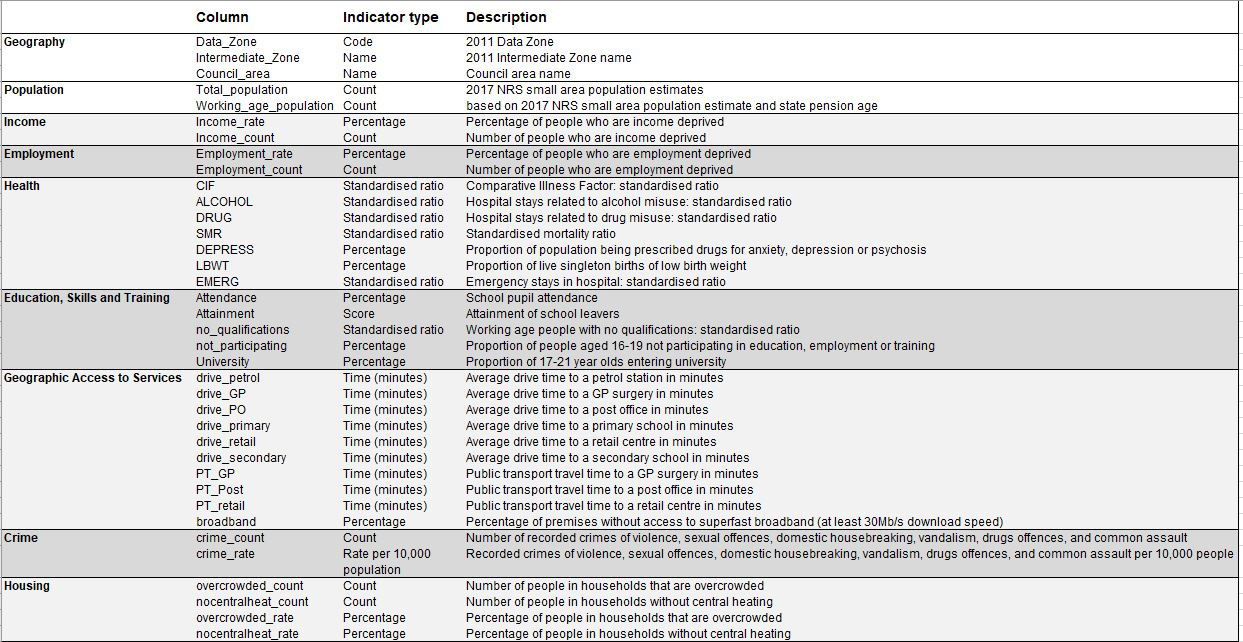

The indicators for each domain were selected on the basis that they are:

- domain-specific and appropriate for the purpose (as direct as possible measures for the given type of deprivation);
- up-to-date;
- capable of being updated on a regular basis;
- statistically robust;
- measure major features of a given type of deprivation (not conditions just experienced by a very small number of people or areas).

The domains are calculated differently depending on the type of data used in each one.

When comparing an index over time it is critical to ensure that the underlying methodology remains consistent from year to year as any changes will distort our analysis. From revoew of the detailed technical guidance the 2020 and 2016 indices share the same methodology. For both these years the granularity is 6976 ***data zones***. 

### Constructing the domains

The income, employment and housing domains are created by summing counts of people and dividing by the appropriate population denominator (taken form the NRS Small Area Population Estimates (SAPE) or Census). The crime domain and some indicators in the health and education domain also use SAPE.

The `income domain` is constructed by adding all five income indicators and dividing by the 2017 mid-year total population from SAPE. Thus, the domain score is a
simple percentage.

The `employment domain` is constructed by adding the three employment indicators and dividing by the 2017 mid-year working age population estimates taken from SAPE. The domain score is a simple percentage.

The `health, education and access domains` are created by ranking the indicators and transforming them to a standard normal distribution. This standardisation process is necessary because the indicators in these domains may be measured in different ways and on different scales. A statistical technique called factor analysis is then used to create a weight for each indicator. Next, the indicators are combined to produce a domain score which is then ranked.

The `crime domain` is a count of selected recorded crimes, divided by the 2017 midyear population estimates from SAPE. It is presented as the crime rate per 10,000
population.

The `housing domain` is the sum of the two housing indicators, divided by the total household population from the 2011 Census. The domain score is a simple percentage. 


### Calculating SIMD

Once the individual domain scores are calculated, they are combined to create the overall SIMD. The overall SIMD is a weighted sum of the seven domain scores, with
different domains given different weights. The weighting is based on the original research conducted by Oxford University, when the original Scottish Index of Multiple Deprivation was first produced, and takes into consideration how up to date and robust the indicators within each domain are.

The domain weighting used for SIMD 2020 remains the same as in SIMD16. A review of the weighting was undertaken when preparing for SIMD16 and concluded that the changes to data quality and methodology were not enough to justify a change of weightings.

The table below shows the percentage of overall SIMD 2020 for each of the seven
domains:

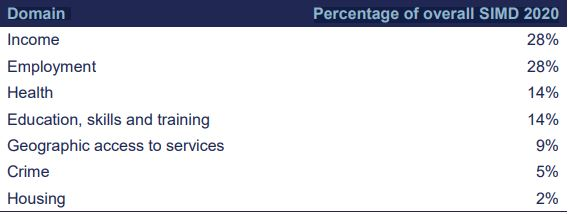

Prior to the weighting, the domains are standardised by ranking the scores. The ranks then undergo exponential transformation to avoid high ranks in one domain
cancelling out low ranks in another. The resulting scores for the overall SIMD are then ranked from 1 (most deprived) to 6,976 (least deprived) to create the final index.

The SIMD 2020 methodology is shown in the flow diagram below :

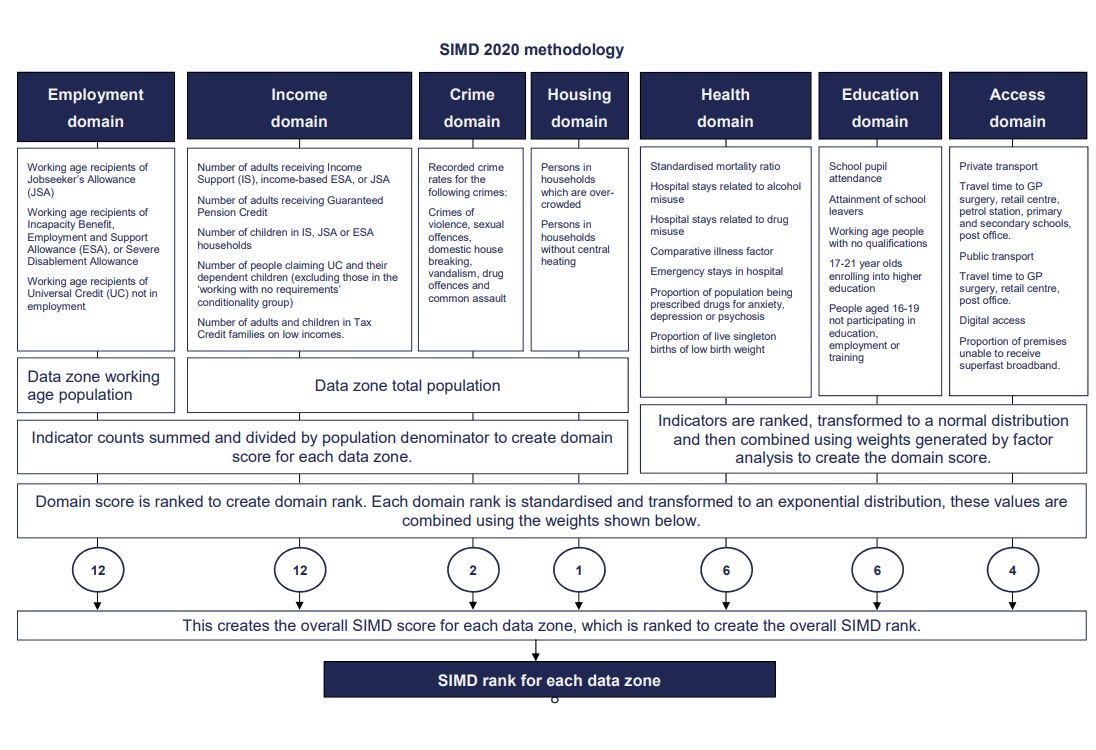

For the 2012 year, the granularity was 6,505 "data zones". In the interests of direct comparability, I have decided to limit the focus of my analysis to the 2016 and 2020 years.

Scotland comprises 32 Council Areas with further granularity provided by 6,976 **data zones** which are used for the purposes of the SIMD. Each data zone represents around 760 people.

https://www.gov.scot/publications/scottish-index-of-multiple-deprivation-rural-deprivation-evidence-review-and-case-studies/

### Data Providers

The following external organisations provided data for the construction of SIMD 2020:
- Department for Work and Pensions
- Her Majesty’s Revenue and Customs 
- National Records of Scotland
- NHS Scotland Information Services Division
- Scottish Qualifications Authority
- Higher Education Statistics Agency
- Skills Development Scotland
- Police Scotland
- Ofcom

### Getting the Data & Maps

The index was introduced in 2004 (and has evolved since then). An [interactive map](https://simd.scot/) is avaialable to explore and you can also download the data zone geospatial and indicator data.

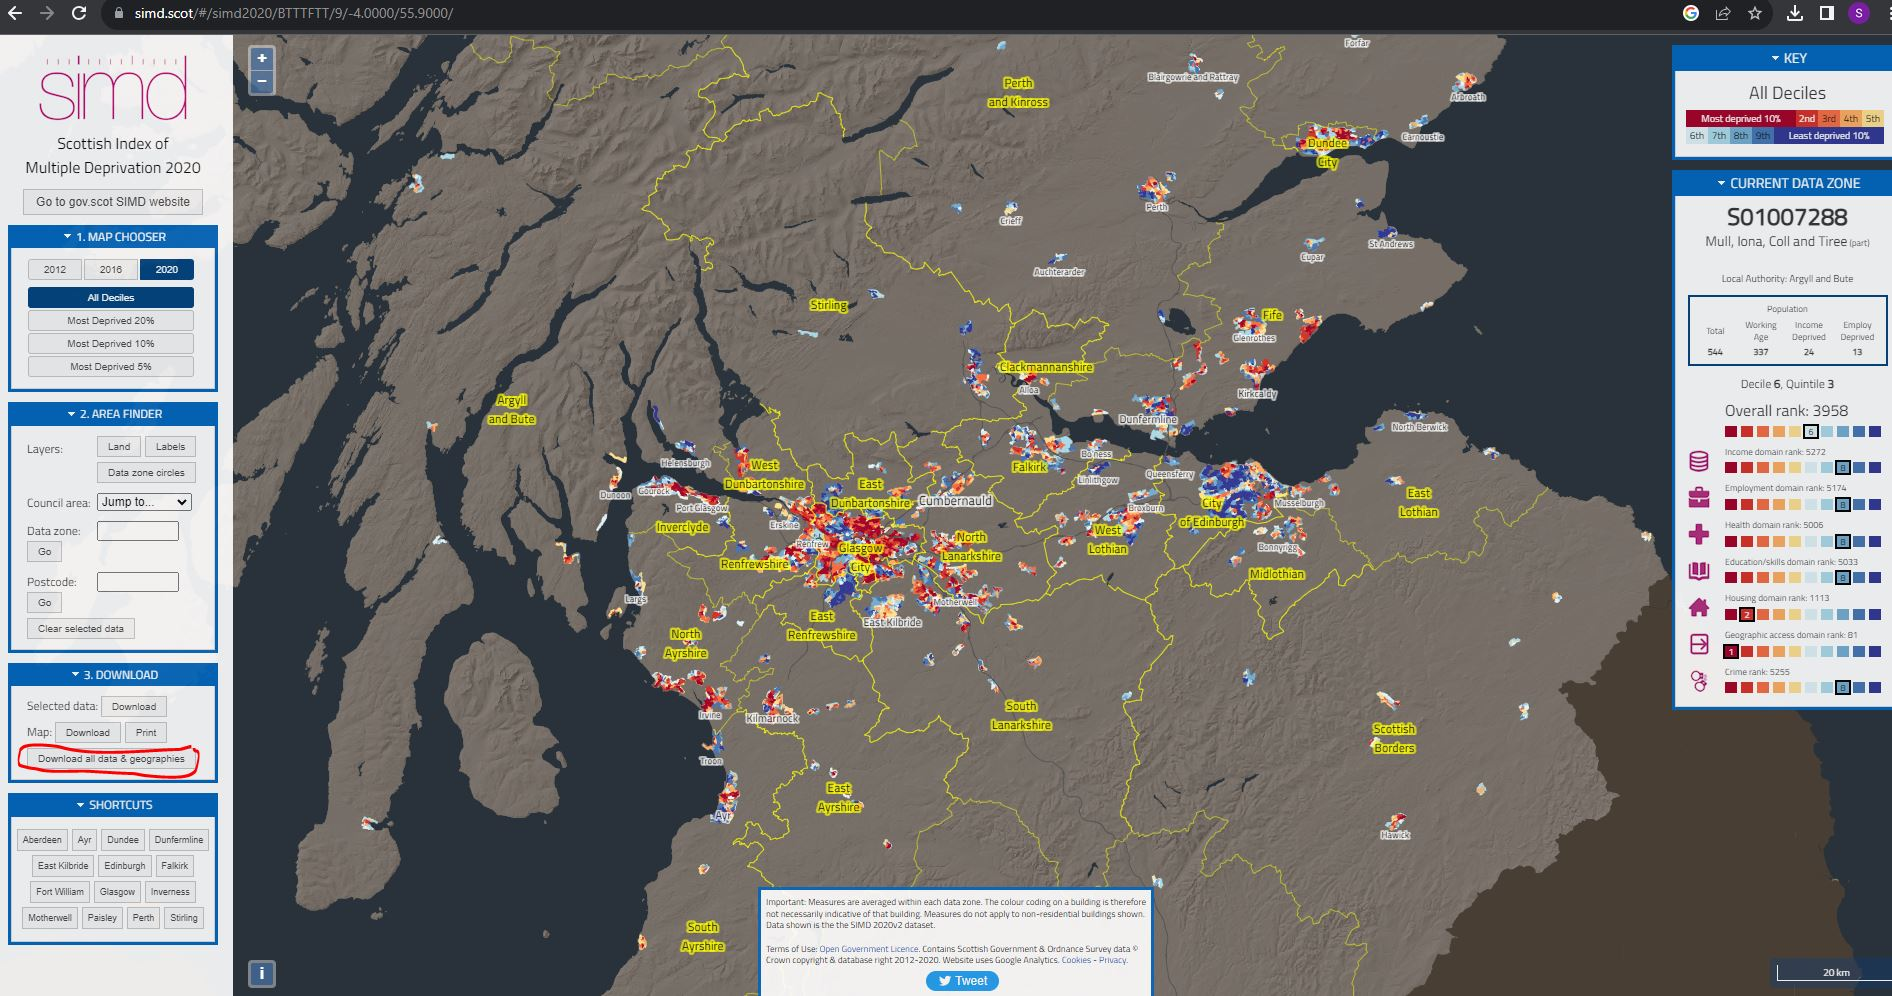

### Getting to know our data

In [1]:
!ls ./data

sc_dz_11.dbf  sc_dz_11.shp				simd2016_withinds.csv
sc_dz_11.prj  sc_dz_11.shx				simd2020_withinds.csv
sc_dz_11.qpj  simd2012_data_00410767_plusintervals.csv


Now that I have downloaded the data it is time to get my hands dirty! Data cleaning and exploration is a critical first step.

### Inport the required packages

In [2]:
import pandas as pd # data manipulation and analysis
import numpy as np # numerical and array-based operations
import geopandas as gpd  # manipulation, analysis, and visualization of geographic datasets
import matplotlib.pyplot as plt
import seaborn as sns

## SIMD - 2020

The SIMD rankings and individual indicators which contribute to the index are included in the `simd2020_withinds.csv` file which we can read in using pandas :

In [3]:
# read in our indicator data
simd_2020 = pd.read_csv('data/simd2020_withinds.csv')
simd_2020.head()

Data_Zone Intermediate_Zone   Council_area  Total_population  \
0  S01006506            Culter  Aberdeen City               894   
1  S01006507            Culter  Aberdeen City               793   
2  S01006508            Culter  Aberdeen City               624   
3  S01006509            Culter  Aberdeen City               537   
4  S01006510            Culter  Aberdeen City               663   

   Working_Age_population  SIMD2020v2_Rank  SIMD_2020v2_Percentile  \
0                     580             4691                      68   
1                     470             4862                      70   
2                     461             5686                      82   
3                     307             4332                      63   
4                     415             3913                      57   

   SIMD2020v2_Vigintile  SIMD2020v2_Decile  SIMD2020v2_Quintile  ...  \
0                    14                  7                    4  ...   
1                    14                  7                    4  ...   
2                    17                  9                    5  ...   
3                    13                  7                    4  ...   
4                    12                  6                    3  ...   

   drive_petrol  drive_GP  drive_post  drive_primary  drive_retail  \
0      2.540103  3.074295    1.616239       2.615747      1.544260   
1      3.915072  4.309812    2.555858       3.646697      2.849656   
2      3.323025  3.784549    1.440991       3.247325      2.062255   
3      2.622991  2.778026    2.620681       1.936908      2.160142   
4      2.115004  2.358335    2.408416       1.845672      1.784635   

   drive_secondary     PT_GP   PT_post  PT_retail broadband  
0         9.930833  8.863589  5.856135   6.023406       11%  
1        11.042816  9.978272  7.515000   7.926029        1%  
2        10.616768  8.620700  4.321493   5.770910        1%  
3        10.036471  7.935112  8.433328   8.329819       11%  
4         9.650000  5.568964  6.966429   6.632609        0%  

[5 rows x 49 columns]

### A quick overview of our data

In [4]:
simd_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6976 entries, 0 to 6975
Data columns (total 49 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Data_Zone                        6976 non-null   object 
 1   Intermediate_Zone                6976 non-null   object 
 2   Council_area                     6976 non-null   object 
 3   Total_population                 6976 non-null   int64  
 4   Working_Age_population           6976 non-null   int64  
 5   SIMD2020v2_Rank                  6976 non-null   int64  
 6   SIMD_2020v2_Percentile           6976 non-null   int64  
 7   SIMD2020v2_Vigintile             6976 non-null   int64  
 8   SIMD2020v2_Decile                6976 non-null   int64  
 9   SIMD2020v2_Quintile              6976 non-null   int64  
 10  SIMD2020v2_Income_Domain_Rank    6976 non-null   float64
 11  SIMD2020_Employment_Domain_Rank  6976 non-null   float64
 12  SIMD2020_Health_Doma

So we have 6976 observations (rows), one for each data zone, and 49 features/indicators (columns).

### Data Types

Understanding the type of data that we have from the outset is crucial if we want to avoid headaches later. The data types for each column are included above and an explanation of each is provided below:

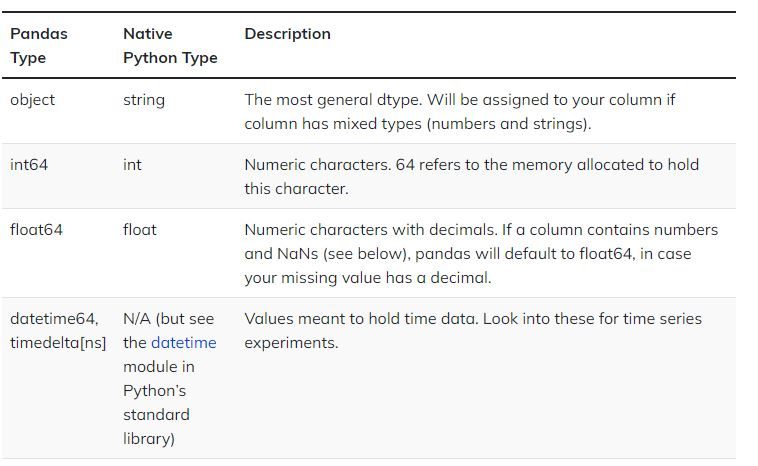

### Missing Data and Quality issues

Let's check to see if there is any missing data:

In [5]:
nan_2020 = simd_2020.isna().sum().sort_values(ascending=False)
nan_2020

Attainment                         11
CIF                                 3
not_participating                   3
SMR                                 2
University                          2
Attendance                          2
EMERG                               2
DRUG                                2
ALCOHOL                             2
broadband                           2
crime_rate                          1
LBWT                                1
DEPRESS                             1
SIMD2020v2_Income_Domain_Rank       0
Total_population                    0
crime_count                         0
overcrowded_count                   0
nocentralheating_count              0
overcrowded_rate                    0
nocentralheating_rate               0
drive_petrol                        0
drive_GP                            0
drive_post                          0
drive_primary                       0
drive_retail                        0
drive_secondary                     0
PT_GP       

In [6]:
number_nan_2020 = nan_2020.sum()
print(f'Our 2020 dataset contains {number_nan_2020} NaN values.')

Our 2020 dataset contains 34 NaN values.


### Review the Technical Report for Data Quality info

#### Income domain

The population estimate for a few data zones was zero in 2017, therefore a rate could not be determined. This is denoted by ‘*’.

#### Employment domain

The population estimate for a few data zones was zero in 2017,therefore a rate could not be determined. This is denoted by ‘*’. 

#### Health domain

After calculating the standardisation there are cases where division by zero occurs due to population estimate of data zone being zero. Such cases are marked "*". 

#### Education, skills and training domain

For some indicators, the population of the considered age group was zero in some data zones during the time period considered, and indicator rates and ranks could not be determined. Missing rates and ranks are denoted by ‘*’. To calculate the overall rankings for the education domain, the normalised scores for these data zones were set to zero before combining the indicators. As a result, the indicators with missing values moved the overall domain ranking of these data zones
towards a middle ranking. 

#### Geographic access to services domain

Drive times have been imputed to 190 minutes for at least some output areas in each of the following eleven data zones (for one or more services) as there was either
no car ferry connection within the time window considered, or the journey was longer than the maximum journey time of 180 minutes:

- S01007284 Mull, Iona, Coll and Tiree (retail centre,secondary school)
- S01007287 Mull, Iona, Coll and Tiree (GP, retail centre,petrol station, secondary school)
- S01007289 Oban South (all services)
- S01007310 Loch Awe – 03 (all services)
- S01007324 Whisky Isles (retail centre, secondary school)
- S01010504 Lochaber West (GP, retail centre, petrol station, secondary school)
- S01010506 Lochaber West (GP, retail centre, petrol station, secondary school)
- S01011831 Isles (Orkney) (retail centre, petrol station, primary school, secondary school)
- S01011832 Isles (Orkney) (retail centre, secondary school)
- S01012387 Shetland South (GP, retail centre, petrol station, secondary school)
- S01012416 North and East Isles (Shetland) (GP, retail centre, petrol station, primary school, secondary school) 

#### Crime domain

In a small number of data zones, the population was zero in the year considered, and crime rates could not be determined. Missing rates are denoted by ‘*’. 

### Data Cleansing

So, we can see that there are some `*` values. This is likely to cause problems so we will need to deal with these. Let's locate them :

`*` values

In [7]:
# Check for columns containing '*'
columns_with_asterisk_2020 = simd_2020.columns[simd_2020.eq('*').any()]

# Print the columns containing '*'
print(columns_with_asterisk_2020)

Index(['Attendance', 'Attainment', 'crime_count', 'crime_rate'], dtype='object')


And replace them with NaN :

In [8]:
simd_2020 = simd_2020.replace('*', np.nan)

In [9]:
number_nan_2020 = simd_2020.isna().sum().sort_values(ascending=False)
updated_number_nan_2020 = number_nan_2020.sum()

In [10]:
print(f'Our updated 2020 dataset contains {updated_number_nan_2020} NaN values.')

Our updated 2020 dataset contains 1777 NaN values.


In [11]:
simd_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6976 entries, 0 to 6975
Data columns (total 49 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Data_Zone                        6976 non-null   object 
 1   Intermediate_Zone                6976 non-null   object 
 2   Council_area                     6976 non-null   object 
 3   Total_population                 6976 non-null   int64  
 4   Working_Age_population           6976 non-null   int64  
 5   SIMD2020v2_Rank                  6976 non-null   int64  
 6   SIMD_2020v2_Percentile           6976 non-null   int64  
 7   SIMD2020v2_Vigintile             6976 non-null   int64  
 8   SIMD2020v2_Decile                6976 non-null   int64  
 9   SIMD2020v2_Quintile              6976 non-null   int64  
 10  SIMD2020v2_Income_Domain_Rank    6976 non-null   float64
 11  SIMD2020_Employment_Domain_Rank  6976 non-null   float64
 12  SIMD2020_Health_Doma

We have some columns with essentially numerical information but held in string format. From review of the indicator table the columns `income_rate`, `employment_rate`, `DEPRESS`, `LBWT`, `Attendance`, `not_participating`, `University`, `broadband`, `overcrowded_rate` and `nocentralheat_rate` represent a percentage. 

`Attainment` is a score.

`crime_count` is a count.\
`crime_rate` is a rate.

Let's convert these columns to more appropriate data types.

The percentage strings include a `%` symbol at the end. Let's first confirm the offending columns : 

In [12]:
# Find columns containing '%' in their values
columns_with_percentage_values_2020 = simd_2020.applymap(lambda x: '%' in str(x)).any()

# Print the columns containing '%' in their values
print(columns_with_percentage_values_2020[columns_with_percentage_values_2020].index)

Index(['income_rate', 'employment_rate', 'DEPRESS', 'LBWT', 'Attendance',
       'not_participating', 'University', 'overcrowded_rate',
       'nocentralheating_rate', 'broadband'],
      dtype='object')


And then remove the `%` from those strings :

In [13]:
# Remove '%' from strings containing it
simd_2020 = simd_2020.applymap(lambda x: str(x).replace('%', '') if '%' in str(x) else x)
simd_2020.head()

Data_Zone Intermediate_Zone   Council_area  Total_population  \
0  S01006506            Culter  Aberdeen City               894   
1  S01006507            Culter  Aberdeen City               793   
2  S01006508            Culter  Aberdeen City               624   
3  S01006509            Culter  Aberdeen City               537   
4  S01006510            Culter  Aberdeen City               663   

   Working_Age_population  SIMD2020v2_Rank  SIMD_2020v2_Percentile  \
0                     580             4691                      68   
1                     470             4862                      70   
2                     461             5686                      82   
3                     307             4332                      63   
4                     415             3913                      57   

   SIMD2020v2_Vigintile  SIMD2020v2_Decile  SIMD2020v2_Quintile  ...  \
0                    14                  7                    4  ...   
1                    14                  7                    4  ...   
2                    17                  9                    5  ...   
3                    13                  7                    4  ...   
4                    12                  6                    3  ...   

   drive_petrol  drive_GP  drive_post  drive_primary  drive_retail  \
0      2.540103  3.074295    1.616239       2.615747      1.544260   
1      3.915072  4.309812    2.555858       3.646697      2.849656   
2      3.323025  3.784549    1.440991       3.247325      2.062255   
3      2.622991  2.778026    2.620681       1.936908      2.160142   
4      2.115004  2.358335    2.408416       1.845672      1.784635   

   drive_secondary     PT_GP   PT_post  PT_retail broadband  
0         9.930833  8.863589  5.856135   6.023406        11  
1        11.042816  9.978272  7.515000   7.926029         1  
2        10.616768  8.620700  4.321493   5.770910         1  
3        10.036471  7.935112  8.433328   8.329819        11  
4         9.650000  5.568964  6.966429   6.632609         0  

[5 rows x 49 columns]

>If you have a column of values in a Pandas DataFrame that are stored as strings but represent floating-point numbers, you can convert that entire column to float values using the `pd.to_numeric()` function with the `errors='coerce'` parameter. This function will attempt to convert the values to numeric format, and if it encounters any invalid values, it will replace them with NaN (Not-a-Number). Here's how you can do it:

In [14]:
# List of column names to convert to float
columns_to_convert_2020 = ['income_rate', 'employment_rate', 'DEPRESS', 'LBWT', 'Attendance', 'Attainment', 'not_participating', 'University', 'crime_count', 'crime_rate', 'overcrowded_rate', 'nocentralheating_rate','broadband']

# Use astype to convert the specified columns to float
simd_2020[columns_to_convert_2020] = simd_2020[columns_to_convert_2020].apply(pd.to_numeric, errors='coerce')                              

In [15]:
simd_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6976 entries, 0 to 6975
Data columns (total 49 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Data_Zone                        6976 non-null   object 
 1   Intermediate_Zone                6976 non-null   object 
 2   Council_area                     6976 non-null   object 
 3   Total_population                 6976 non-null   int64  
 4   Working_Age_population           6976 non-null   int64  
 5   SIMD2020v2_Rank                  6976 non-null   int64  
 6   SIMD_2020v2_Percentile           6976 non-null   int64  
 7   SIMD2020v2_Vigintile             6976 non-null   int64  
 8   SIMD2020v2_Decile                6976 non-null   int64  
 9   SIMD2020v2_Quintile              6976 non-null   int64  
 10  SIMD2020v2_Income_Domain_Rank    6976 non-null   float64
 11  SIMD2020_Employment_Domain_Rank  6976 non-null   float64
 12  SIMD2020_Health_Doma

### Raw stats

In [17]:
scotland_population_2020 = simd_2020.Total_population.sum()
scotland_working_age_populaton_2020 = simd_2020.Working_Age_population.sum()
scotland_income_deprived_2020 = simd_2020.income_count.sum()
scotland_employment_deprived_2020 = simd_2020.employment_count.sum()
scotland_overcrowded_count_2020 = simd_2020.overcrowded_count.sum()
scotland_naeheating_count_2020 = simd_2020.nocentralheating_count.sum()

In [18]:
print(f'The total estimated population of Scotland in 2020 was: {scotland_population_2020}.')
print(f'The total estimated working age population of Scotland in 2020 was: {scotland_working_age_populaton_2020}.')
print(f"The total number of people classified as 'income deprived' in 2020 was: {scotland_income_deprived_2020}.")
print(f"The total number of people classified as living in 'overcrowded' conditions in 2020 was: {scotland_overcrowded_count_2020}.")
print(f"The total number of people classified as having no central heating in 2020 was: {scotland_naeheating_count_2020}.")

The total estimated population of Scotland in 2020 was: 5424800.
The total estimated working age population of Scotland in 2020 was: 3494791.
The total number of people classified as 'income deprived' in 2020 was: 654561.
The total number of people classified as living in 'overcrowded' conditions in 2020 was: 574352.
The total number of people classified as having no central heating in 2020 was: 93692.


### Visualizations - Histograms, Boxplots, Scatterplots

We can very quickly get a picture of the spread of our data using histograms and boxplots : 

#### Total Population of Data Zones

In [19]:
simd_2020.Total_population.describe()

count    6976.000000
mean      777.637615
std       219.108923
min         0.000000
25%       635.000000
50%       755.000000
75%       886.000000
max      3847.000000
Name: Total_population, dtype: float64

<AxesSubplot: xlabel='Total_population', ylabel='Count'>

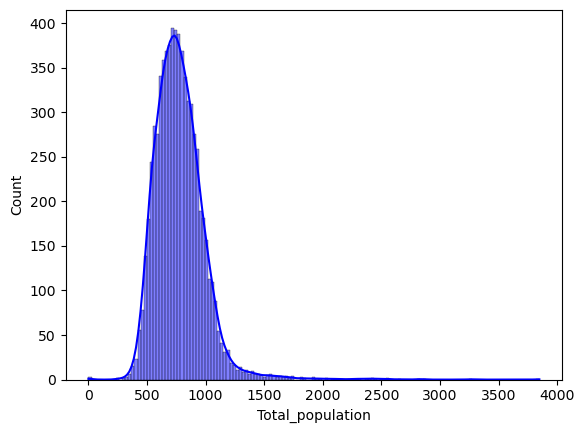

In [20]:
sns.histplot(data=simd_2020['Total_population'], kde=True, color='blue')

Text(0.5, 1.0, 'Boxplot of Data Zone populations')

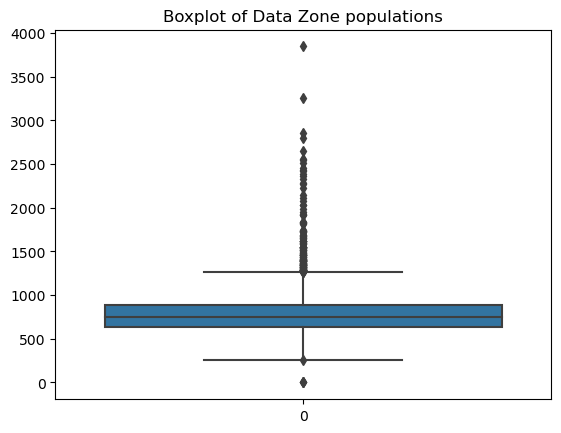

In [27]:
sns.boxplot(data=simd_2020['Total_population'])
# Add a title to your plot
plt.title("Boxplot of Data Zone populations")

As we can see the population of the datazones is generally centred around 750 but there some very low (zero) and very high (3,847) values.

#### Working Age Population of Data Zones

In [28]:
simd_2020.Working_Age_population.describe()

count    6976.000000
mean      500.973481
std       175.075939
min         0.000000
25%       395.000000
50%       475.000000
75%       568.000000
max      3423.000000
Name: Working_Age_population, dtype: float64

<AxesSubplot: xlabel='Working_Age_population', ylabel='Count'>

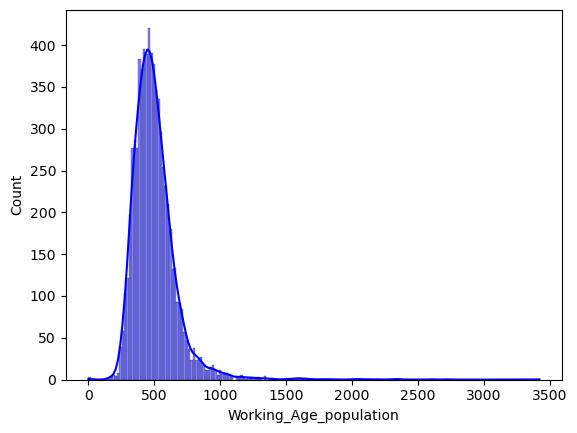

In [29]:
sns.histplot(data=simd_2020['Working_Age_population'], kde=True, color='blue')

Text(0.5, 1.0, 'Boxplot of Data Zone working age populations')

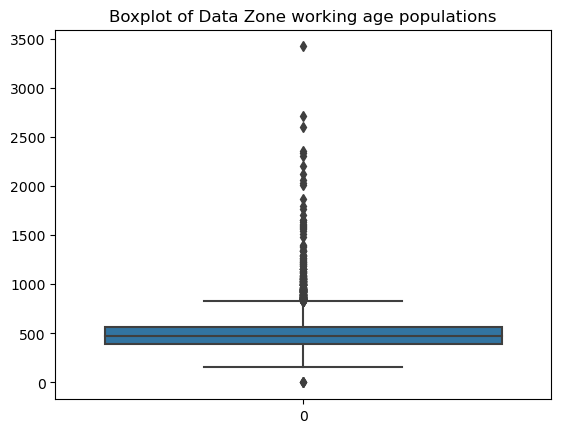

In [31]:
sns.boxplot(data=simd_2020['Working_Age_population'])
# Add a title to your plot
plt.title("Boxplot of Data Zone working age populations")

As we can see the working population of the datazones is generally centred around 500 but there some very low (zero) and very high (3,423) values.

### Relationship between different indicators 

We can also explore the inter-relationships between variables using scatterplots - e.g. is there any relationship between no qualifications and employmemt deprivation?

<AxesSubplot: xlabel='no_qualifications', ylabel='employment_count'>

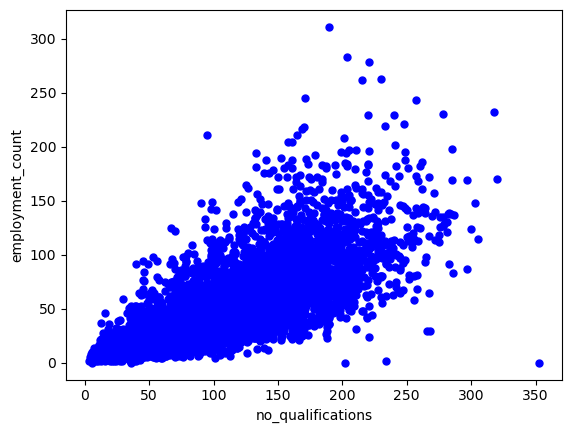

In [32]:
# Create a scatterplot
simd_2020.plot.scatter(x='no_qualifications', y='employment_count', c='blue', marker='o', s=25)

As one might expect there is a general positive trend, although not very strong. Generally, although there are clearly outliers, data zones which have a high number of people with no qualifications tend to also have a high number of people who are considered employment deprived.

### Adding a geospatial dimension to our non-spatial indicator data

Whilst we were able to readily obtain some useful insights using histograms, boxplots and scatterplots, let's harness the geospatial element of our data and visualize it using a map, which is a powerful and persuasive medium,  particularly for highlighting *where* to allocate resources, which is a key task of government.

Adding geospatial data in the form of a map adds a further layer of understanding.

### Data Zone Polygons

We have a `sc_dz_11.shp` file which contains the geometry of the `Data Zones`. This is of little value on its own but we can reveal powerful insights by combiming this with the indicator data that we have just cleaned up`simd_2020`.

We can get the datazones info using GeoPandas - we simply read in the file which creates a GeoPandas DataFrame :

In [33]:
datazones = gpd.read_file('data/sc_dz_11.shp')
datazones.head()

DataZone         Name  TotPop2011  ResPop2011  HHCnt2011   StdAreaHa  \
0  S01006506  Culter - 01         872         852        424  438.880218   
1  S01006507  Culter - 02         836         836        364   22.349739   
2  S01006508  Culter - 03         643         643        340   27.019476   
3  S01006509  Culter - 04         580         580        274    9.625426   
4  S01006510  Culter - 05         644         577        256   18.007657   

   StdAreaKm2    Shape_Leng    Shape_Area  \
0    4.388801  11801.872345  4.388802e+06   
1    0.223498   2900.406362  2.217468e+05   
2    0.270194   3468.761949  2.701948e+05   
3    0.096254   1647.461389  9.625426e+04   
4    0.180076   3026.111412  1.800766e+05   

                                            geometry  
0  POLYGON ((-2.27748 57.09527, -2.27644 57.09521...  
1  POLYGON ((-2.27354 57.10449, -2.27333 57.10449...  
2  POLYGON ((-2.27443 57.10171, -2.27237 57.10046...  
3  POLYGON ((-2.26611 57.10133, -2.26599 57.10092...  
4  POLYGON ((-2.26013 57.10160, -2.26050 57.10134...

In [34]:
type(datazones)

geopandas.geodataframe.GeoDataFrame

We can get a very quick plot of our map :

<AxesSubplot: >

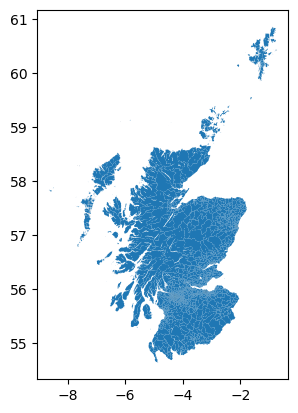

In [35]:
datazones.plot()

I think I recognise that country!

### QGIS

`QGIS`, which stands for Quantum Geographic Information System, is an open-source geographic information system (GIS) software that allows users to create, edit, analyze, visualize, and manage geographic and spatial data. Here's a brief overview of QGIS:

`Open Source:`
QGIS is open-source software, which means it is freely available to anyone, and its source code can be modified and extended by the community of users and developers. This makes it a cost-effective option for working with spatial data.

`Cross-Platform:`
QGIS is a cross-platform application, meaning it is available for various operating systems, including Windows, macOS, and Linux. This allows users to work with GIS data on their preferred platform.

`User-Friendly Interface:`
QGIS features an intuitive and user-friendly graphical interface that is accessible to both beginners and experienced GIS professionals. It provides a wide range of tools and functionalities for spatial data management and analysis.

`Data Formats:`
QGIS supports a vast array of spatial data formats, including shapefiles, GeoTIFF, PostGIS, and more. It can import and export data in various formats, making it compatible with many GIS datasets.

`Data Visualization:`
Users can create maps and visualize geographic data using QGIS. It offers extensive cartographic tools to design and customize maps, including symbology, labeling, and map layout options.

`Data Editing:`
QGIS allows users to edit spatial data, making it useful for tasks such as digitizing features, updating attribute information, and performing spatial data cleaning.

`Spatial Analysis:`
One of QGIS's strengths is its ability to perform spatial analysis. Users can conduct various geoprocessing tasks, such as buffering, spatial queries, intersection analysis, and more, to gain insights from spatial data.

`Plugins and Extensions:`
QGIS has a vibrant plugin ecosystem that allows users to extend its functionality. There are numerous plugins available for specialized tasks and data sources.

`Integration with Other Software:`
QGIS can be integrated with other GIS and geospatial software, including databases like PostGIS, as well as with programming languages like Python for scripting and automation.

`Community and Support:`
Being open source, QGIS benefits from a large and active user community. Users can find documentation, tutorials, and user forums for assistance and support.

`Customization:`
Users can customize QGIS to suit their specific needs. This includes creating custom forms, expressions, and processing models.

`Remote Sensing:`
QGIS includes tools for working with remote sensing data, allowing users to analyze and process satellite and aerial imagery.

QGIS is a powerful and versatile GIS software that serves a wide range of users, from hobbyists to professionals, for tasks related to spatial data analysis, mapping, and visualization. Its open-source nature and active community make it a valuable tool for those working with geographic and spatial data.

### Visualizing the SIMD 2020 in QGIS

Let's see how the map looks in QGIS which is better equipped for visualizing maps.

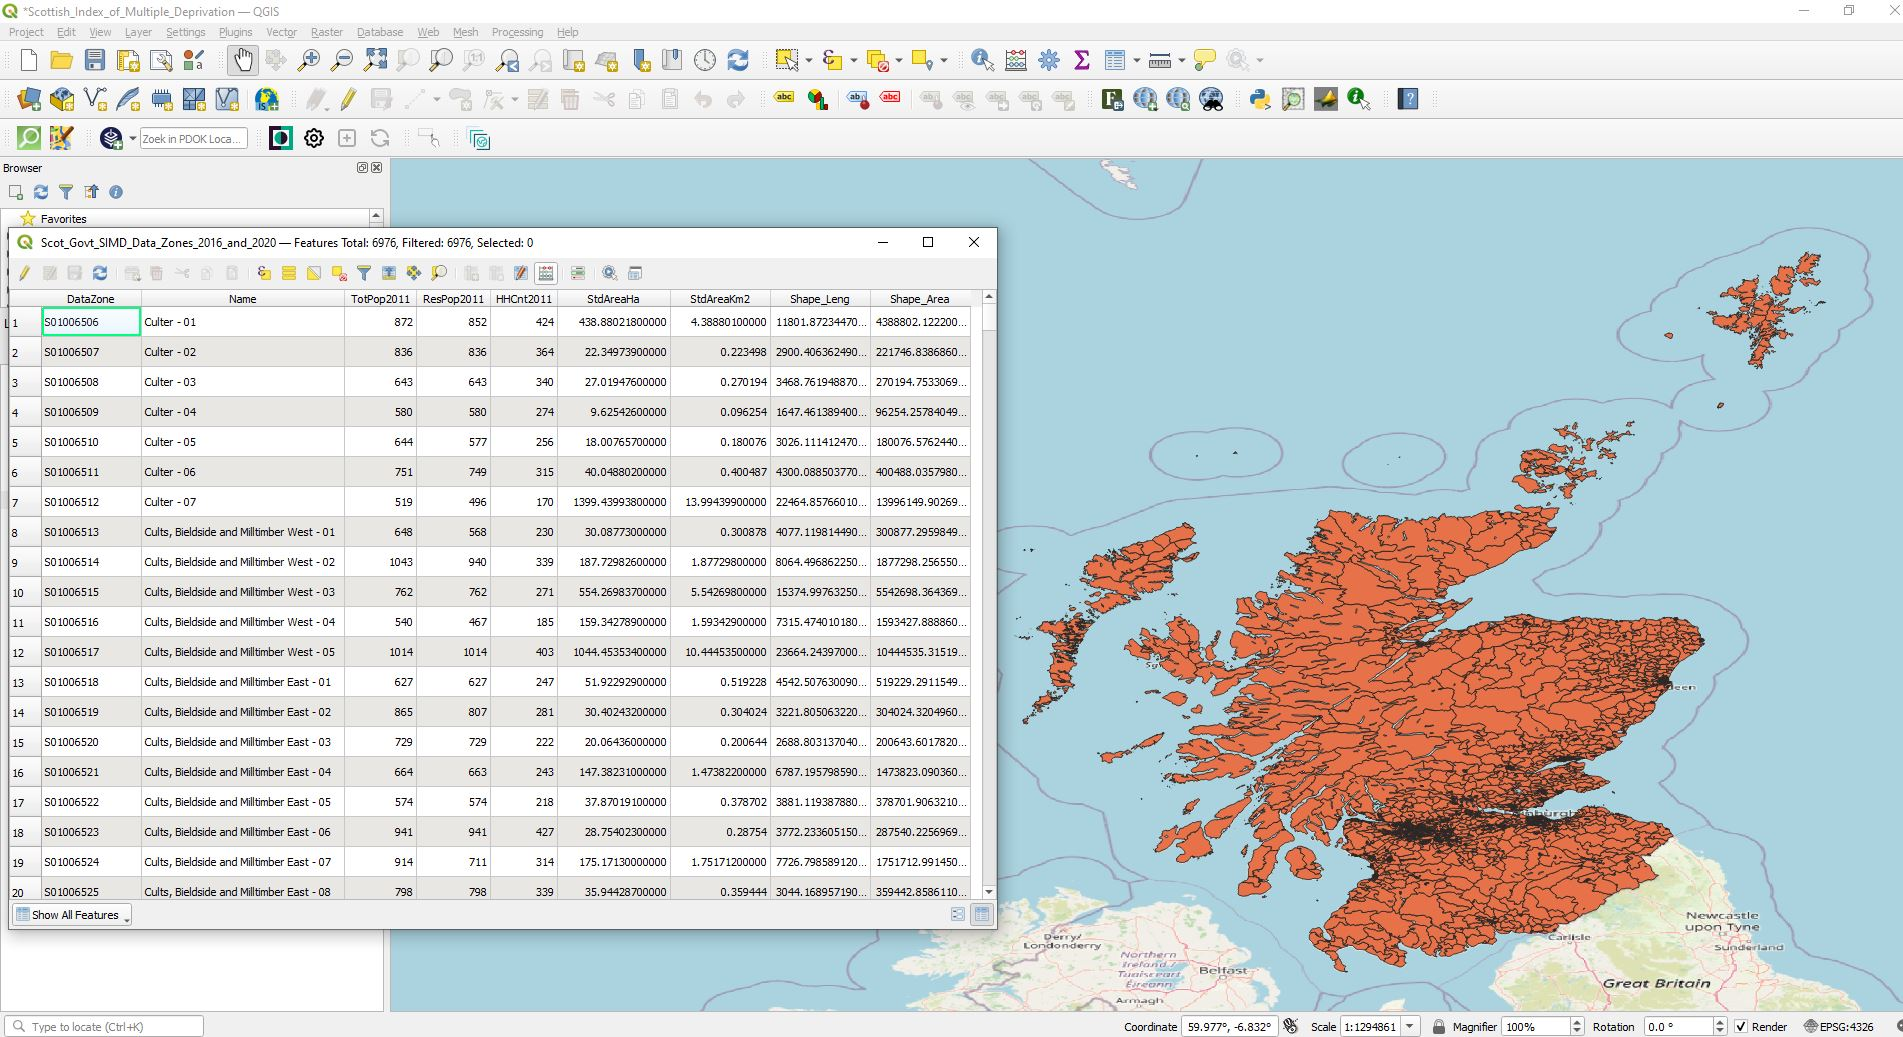

As you can see the shape file contains some basic metadata which can be accessed from by right clicking the datazones layer and selecting `Open Attribute Table`, however in order to visualize out SIMD data on the map we need to join our `simd_2020` table to our `datazones` table.

### Joining our our geospatial datazone dataset to our non-spatial SIMD dataset

In an attribute join, a GeoSeries or GeoDataFrame is combined with a regular `pandas.Series` or `pandas.DataFrame` based on a common variable. This is analogous to normal merging or joining in pandas.

In our case we can join `datazones` (a GeoDataFrame) to `simd_2020` (a pandas DataFrame) on a common variable (Data Zone - reference S12345678).

To allow us to join on this shared feature, let's first rename `Data_Zone` to `DataZone` in the `simd_2020 dataframe` :

In [37]:
simd_2020.rename(columns={"Data_Zone": "DataZone"}, inplace=True)
simd_2020.head()

DataZone Intermediate_Zone   Council_area  Total_population  \
0  S01006506            Culter  Aberdeen City               894   
1  S01006507            Culter  Aberdeen City               793   
2  S01006508            Culter  Aberdeen City               624   
3  S01006509            Culter  Aberdeen City               537   
4  S01006510            Culter  Aberdeen City               663   

   Working_Age_population  SIMD2020v2_Rank  SIMD_2020v2_Percentile  \
0                     580             4691                      68   
1                     470             4862                      70   
2                     461             5686                      82   
3                     307             4332                      63   
4                     415             3913                      57   

   SIMD2020v2_Vigintile  SIMD2020v2_Decile  SIMD2020v2_Quintile  ...  \
0                    14                  7                    4  ...   
1                    14                  7                    4  ...   
2                    17                  9                    5  ...   
3                    13                  7                    4  ...   
4                    12                  6                    3  ...   

   drive_petrol  drive_GP  drive_post  drive_primary  drive_retail  \
0      2.540103  3.074295    1.616239       2.615747      1.544260   
1      3.915072  4.309812    2.555858       3.646697      2.849656   
2      3.323025  3.784549    1.440991       3.247325      2.062255   
3      2.622991  2.778026    2.620681       1.936908      2.160142   
4      2.115004  2.358335    2.408416       1.845672      1.784635   

   drive_secondary     PT_GP   PT_post  PT_retail  broadband  
0         9.930833  8.863589  5.856135   6.023406       11.0  
1        11.042816  9.978272  7.515000   7.926029        1.0  
2        10.616768  8.620700  4.321493   5.770910        1.0  
3        10.036471  7.935112  8.433328   8.329819       11.0  
4         9.650000  5.568964  6.966429   6.632609        0.0  

[5 rows x 49 columns]

And then go ahead and join the datasets :

In [38]:
# merge geospatial datazones to non-spatial simd_2020
simd_2020_merged = datazones.merge(simd_2020, on='DataZone')
simd_2020_merged.head()

DataZone         Name  TotPop2011  ResPop2011  HHCnt2011   StdAreaHa  \
0  S01006506  Culter - 01         872         852        424  438.880218   
1  S01006507  Culter - 02         836         836        364   22.349739   
2  S01006508  Culter - 03         643         643        340   27.019476   
3  S01006509  Culter - 04         580         580        274    9.625426   
4  S01006510  Culter - 05         644         577        256   18.007657   

   StdAreaKm2    Shape_Leng    Shape_Area  \
0    4.388801  11801.872345  4.388802e+06   
1    0.223498   2900.406362  2.217468e+05   
2    0.270194   3468.761949  2.701948e+05   
3    0.096254   1647.461389  9.625426e+04   
4    0.180076   3026.111412  1.800766e+05   

                                            geometry  ... drive_petrol  \
0  POLYGON ((-2.27748 57.09527, -2.27644 57.09521...  ...     2.540103   
1  POLYGON ((-2.27354 57.10449, -2.27333 57.10449...  ...     3.915072   
2  POLYGON ((-2.27443 57.10171, -2.27237 57.10046...  ...     3.323025   
3  POLYGON ((-2.26611 57.10133, -2.26599 57.10092...  ...     2.622991   
4  POLYGON ((-2.26013 57.10160, -2.26050 57.10134...  ...     2.115004   

   drive_GP  drive_post  drive_primary  drive_retail  drive_secondary  \
0  3.074295    1.616239       2.615747      1.544260         9.930833   
1  4.309812    2.555858       3.646697      2.849656        11.042816   
2  3.784549    1.440991       3.247325      2.062255        10.616768   
3  2.778026    2.620681       1.936908      2.160142        10.036471   
4  2.358335    2.408416       1.845672      1.784635         9.650000   

      PT_GP   PT_post  PT_retail  broadband  
0  8.863589  5.856135   6.023406       11.0  
1  9.978272  7.515000   7.926029        1.0  
2  8.620700  4.321493   5.770910        1.0  
3  7.935112  8.433328   8.329819       11.0  
4  5.568964  6.966429   6.632609        0.0  

[5 rows x 58 columns]

As you can see we now have a geospatial dataset - there is a `geometry` column which includes the data zone polygons, and the other columns represent the features related to each individual datazone.

Let's save it as a shapefile for viewing in QGIS.

In [39]:
# save merged dataframe to a shapefile
simd_2020_merged.to_file('simd_2020_merged.shp')  

/tmp/ipykernel_139/619268410.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  simd_2020_merged.to_file('simd_2020_merged.shp')


### Creating a Chloropleth Map of the SIMD

Choropleth maps are a type of thematic map used to represent spatial patterns and variations in data across different geographic regions. 

#### Create a new layer

To create a new layer right click on the `simd_2020_merged` layer and select Export / Save Features As. Then configure as follows :

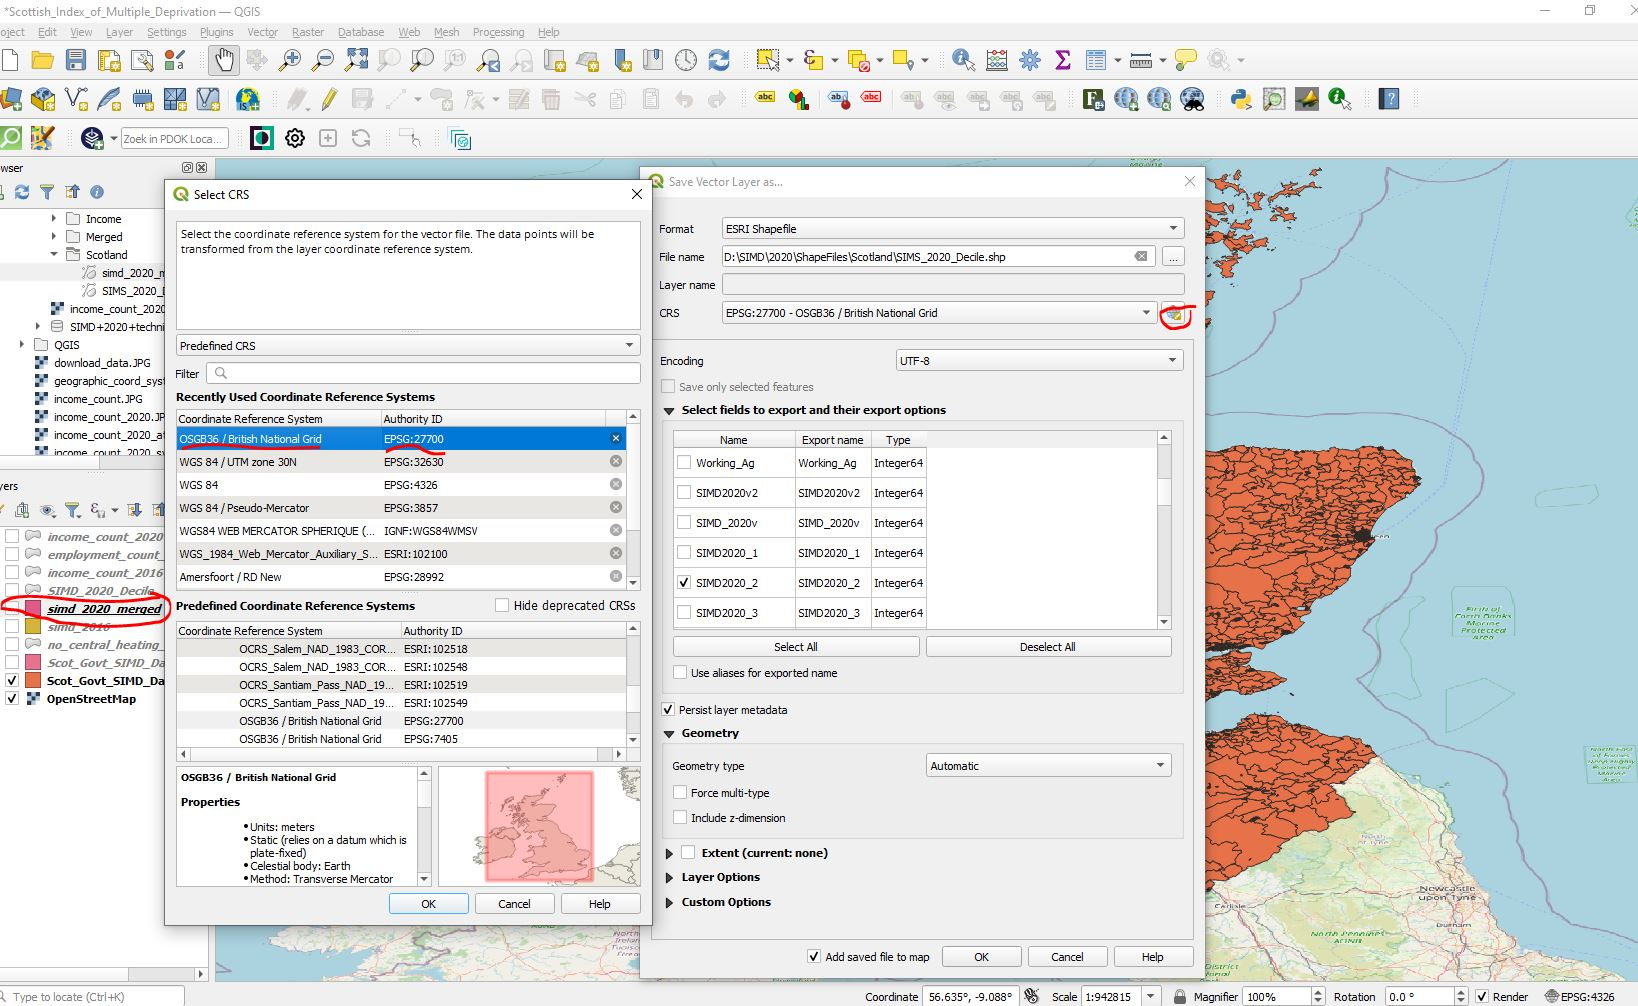

>Note that it is important to choose an appropriate  `projected coordinate system` (in my case ESPG:27700) and **not** a `geographical` coordinate system such as WGS84. This is something that ArcGis requires in order to perform a Optimized Hot Spot Analysis - see the later section on ArcGis.

Now when we drop this new layer into QGIS and open the attribute table, we can see that all the SIMD data is included. 

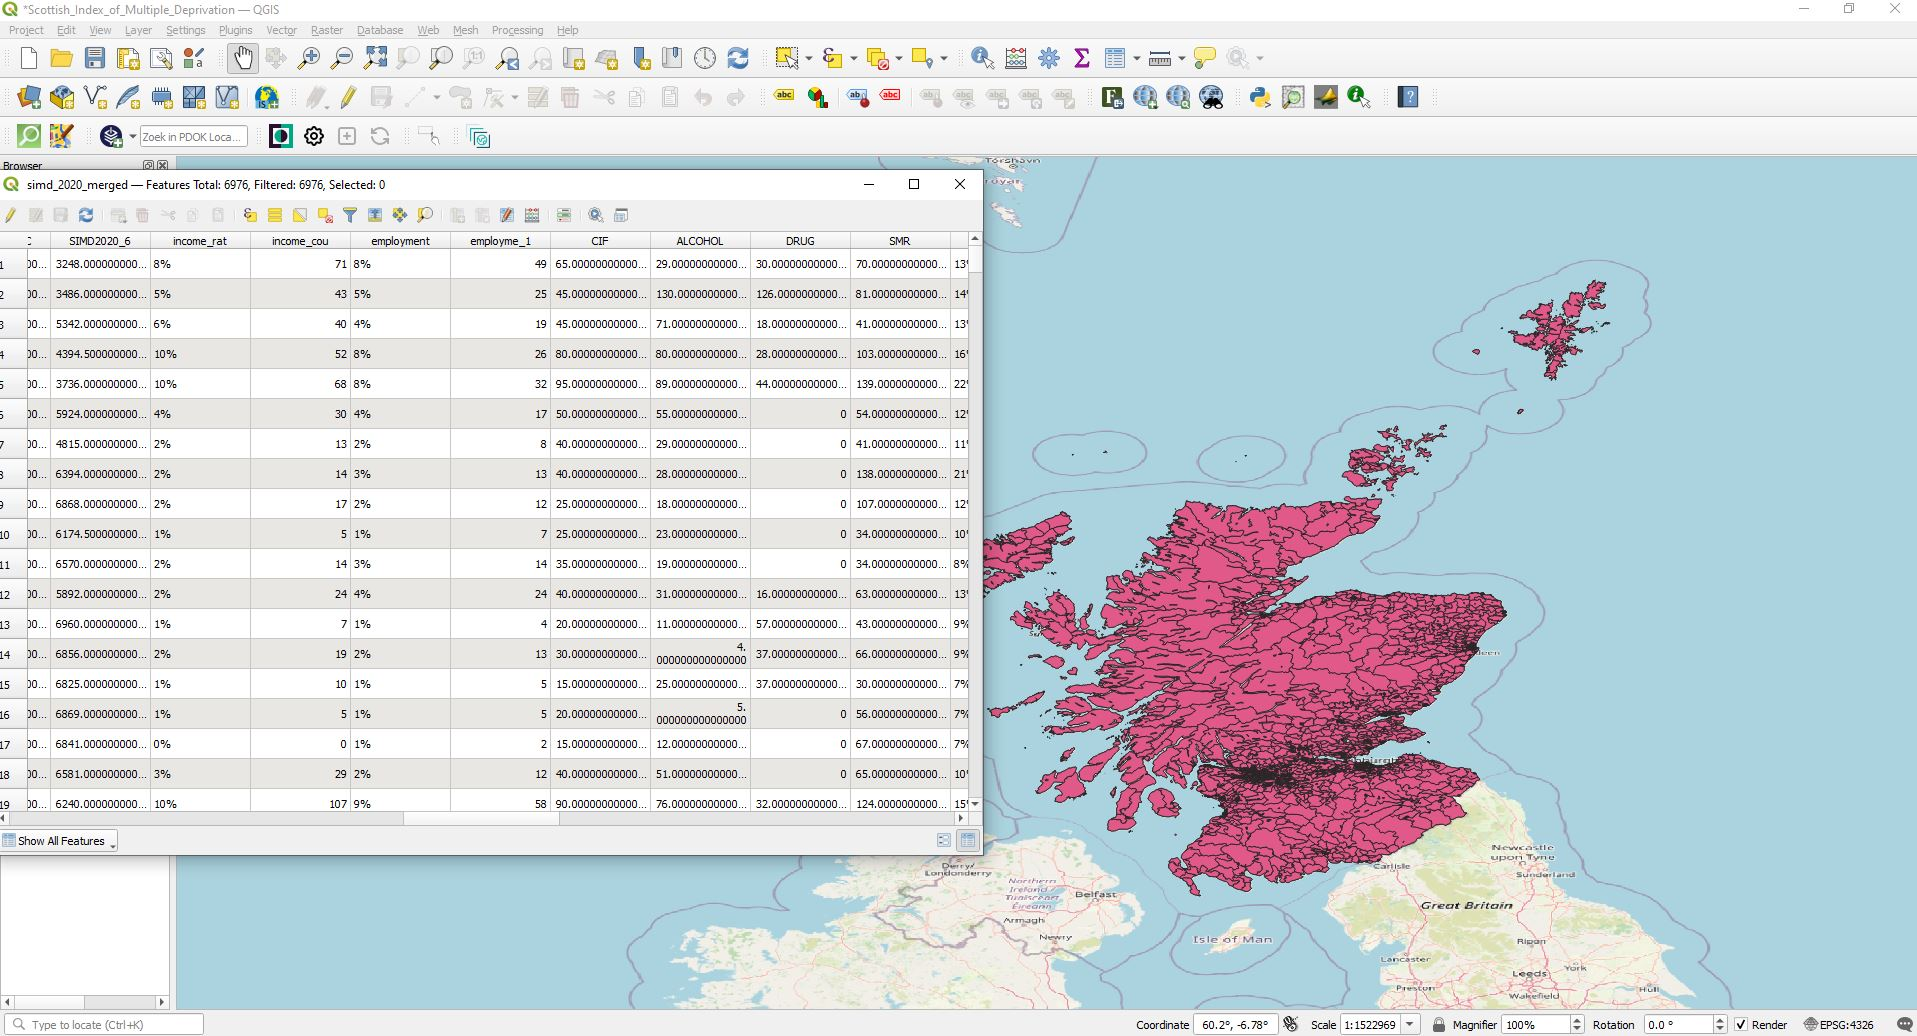

### Styling our layer

Now that we have our new layer let's create a chloropeth map of the SIMD. 

Right click on the `simd_2020` layer, select `Properties` then `Symbology`. Change `Single Symbol` to `Graduated`, select `SIMD2020_2` from the `Value` dropdown. 

`Color Ramp`

Choosing an appropriate colour for your map is worthy of an entire book of its own! For example for elevation often a blue to red ramp is used to symbolise the ascent from sea to sun.

I have used Blues, darker shades indicate higher levels of deprivation.

`Classification Mode`

Classification mode choice can ***strongly*** influence the story that you wish to tell. Again the subject is worthy of its own book. QGIS offers a choice of predefined modes, with the option to create your own customized mode.

In my case I have used the `Natural Breaks (Jenks)` mode of classification, and edited the legend to mirror the [interactive government SIMD map](https://simd.scot/#/simd2020/BTTTFTT/9/-4.0000/55.9000/).

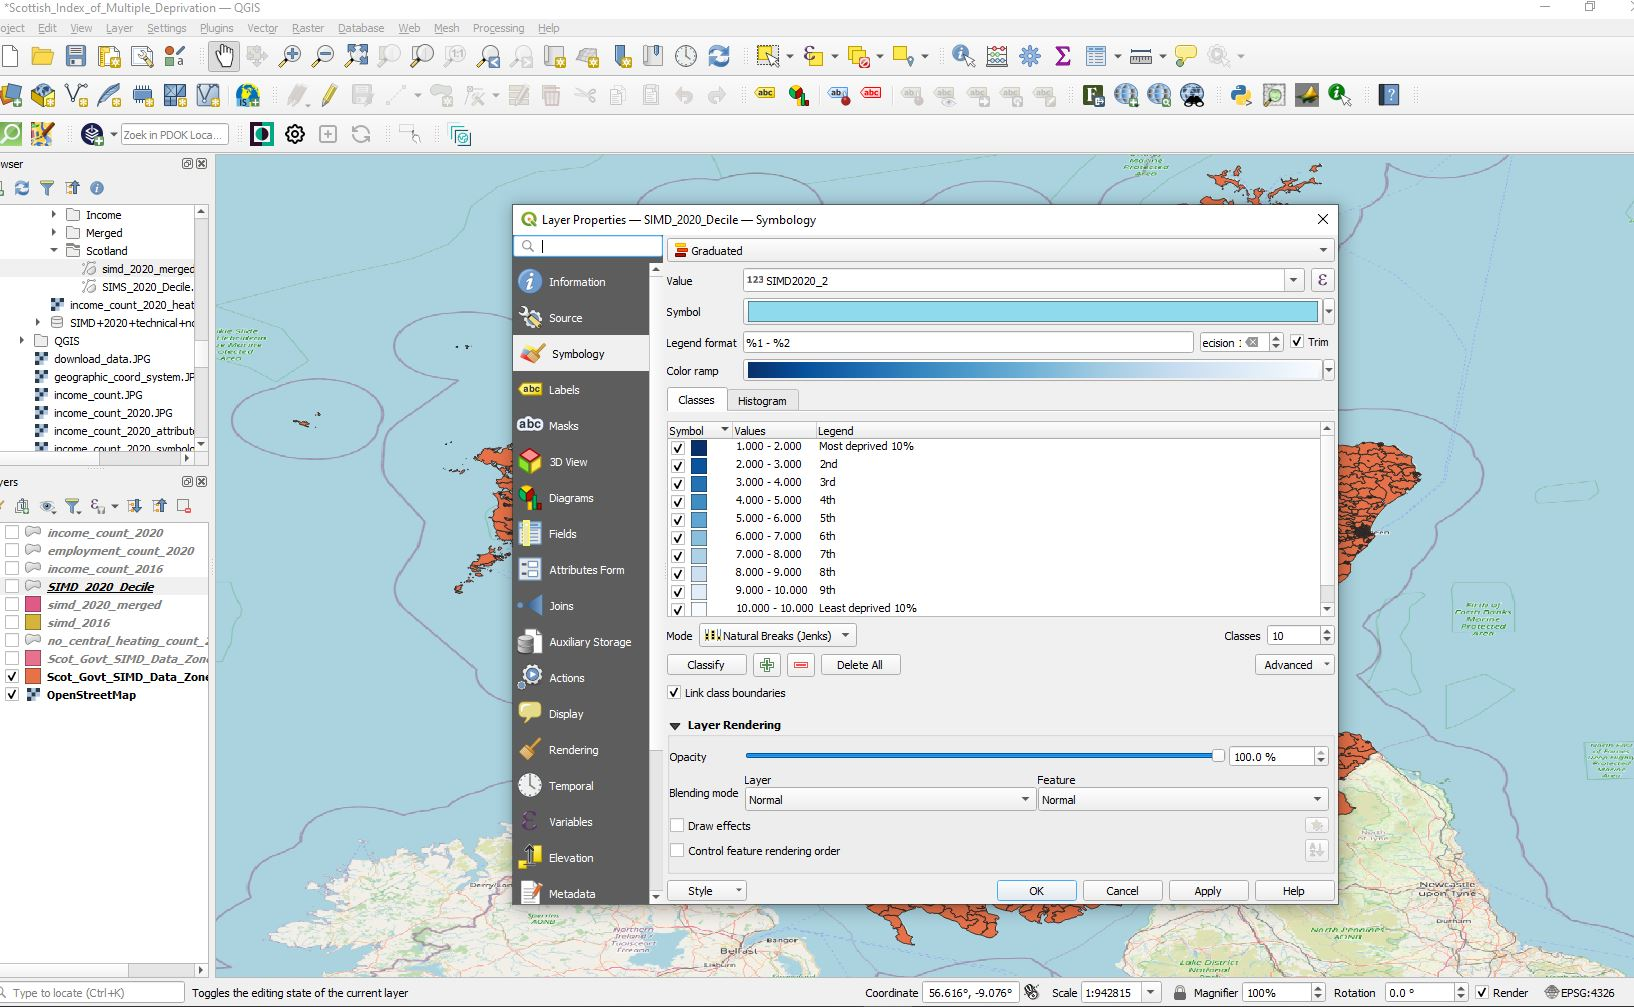

Hit OK and we have our map! We can clearly see the most deprived areas in dark blue, with the least deprived in light blue.

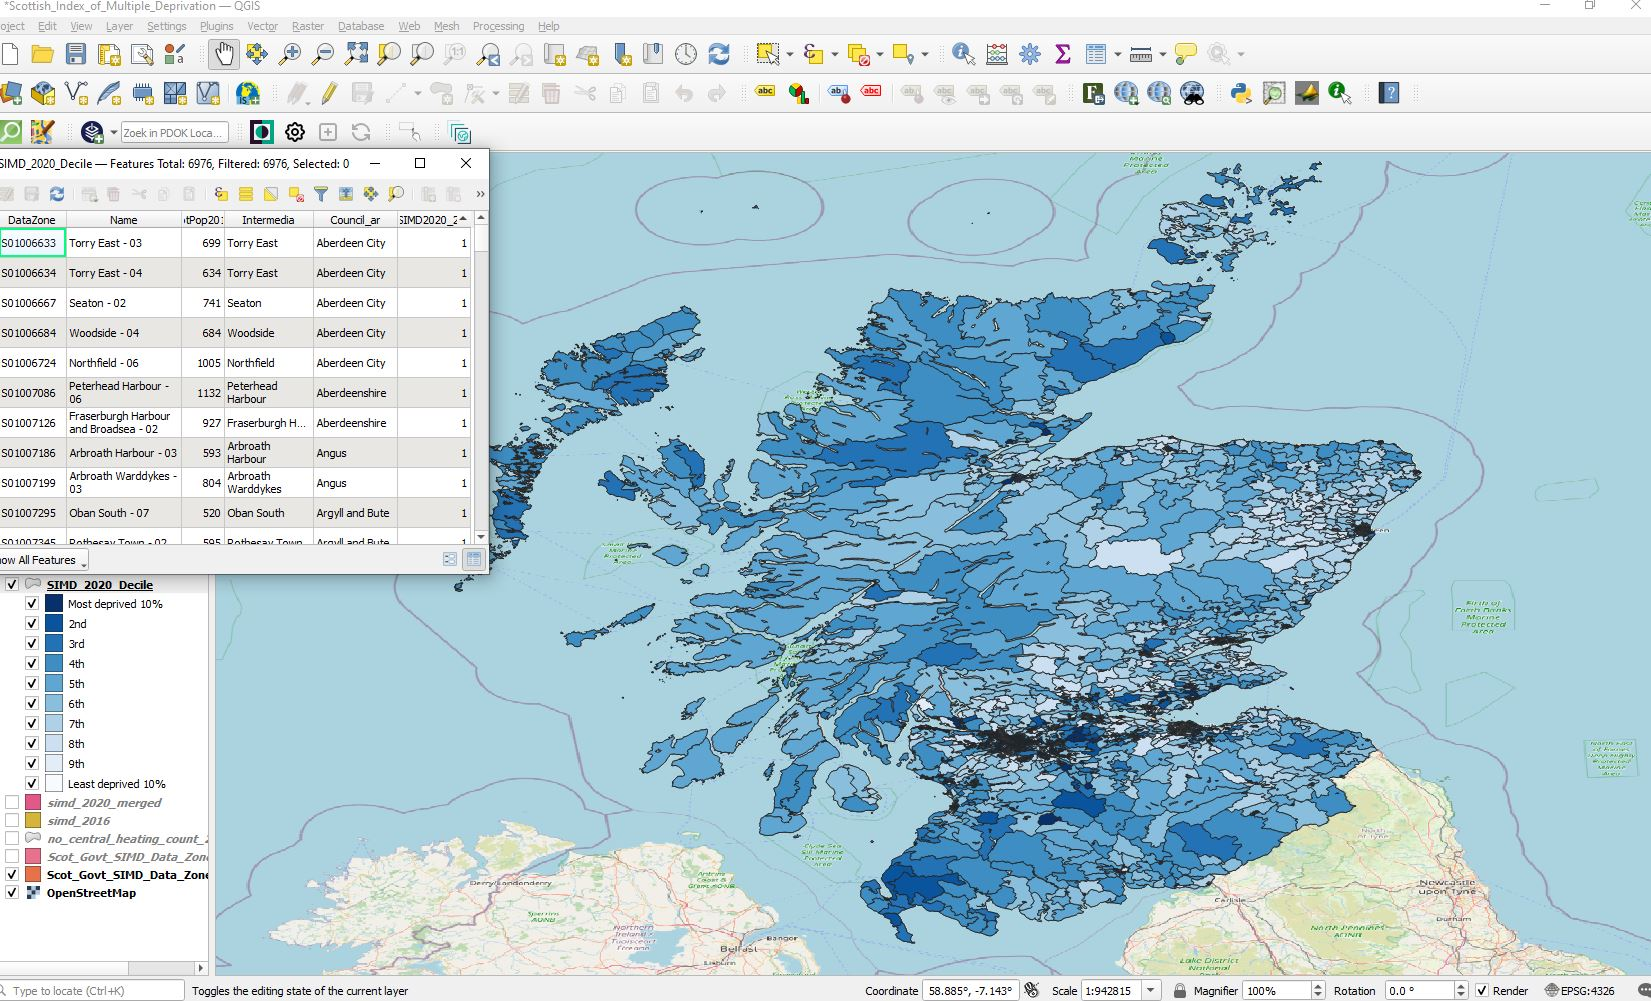



### Deconstructing the index - creating separate layers

Let's take a look at one of the indicators that contribute to the overall index in isolation. We can simply creare a new layer as before, for example `Income Count` which describes the number of people who are "income deprived".

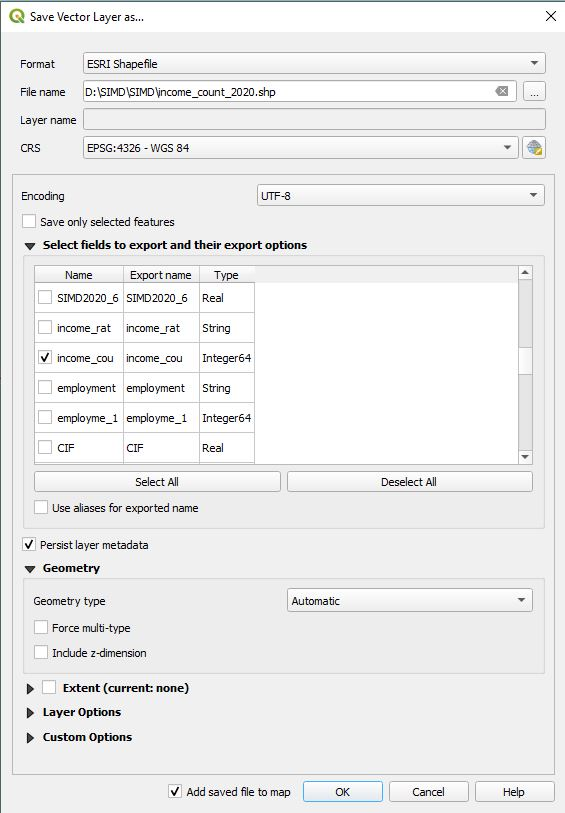

We can confirm the attributes of this new layer by right clicking on the layer and choosing `Open Attribute Table`

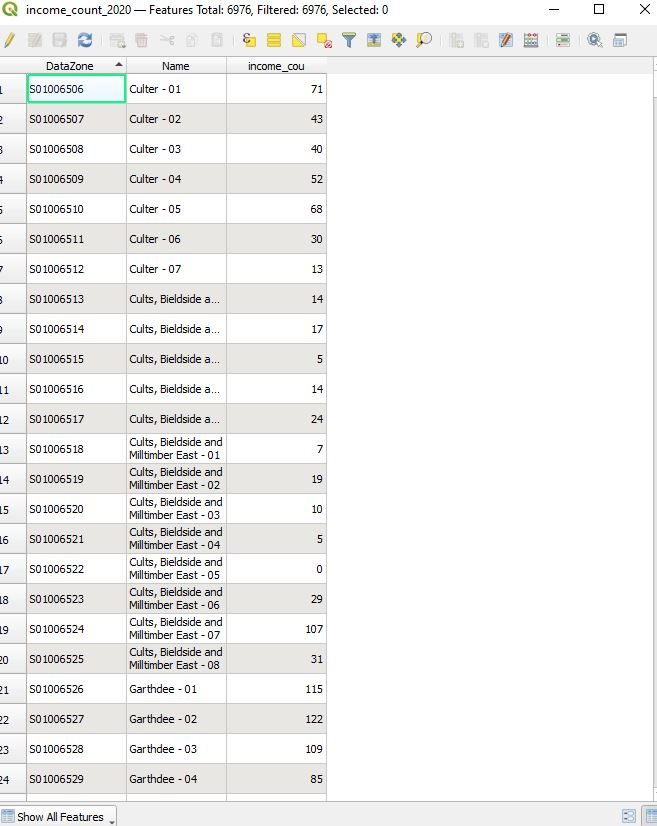


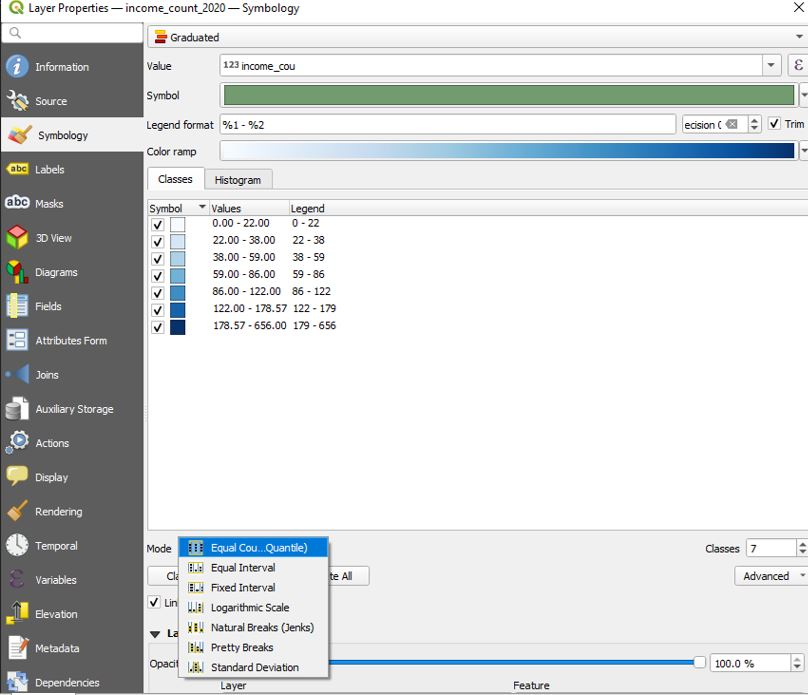


Again we can clearly see the areas in dark blue which are considered to be "income deprived" with the least deprived coloured light blue.

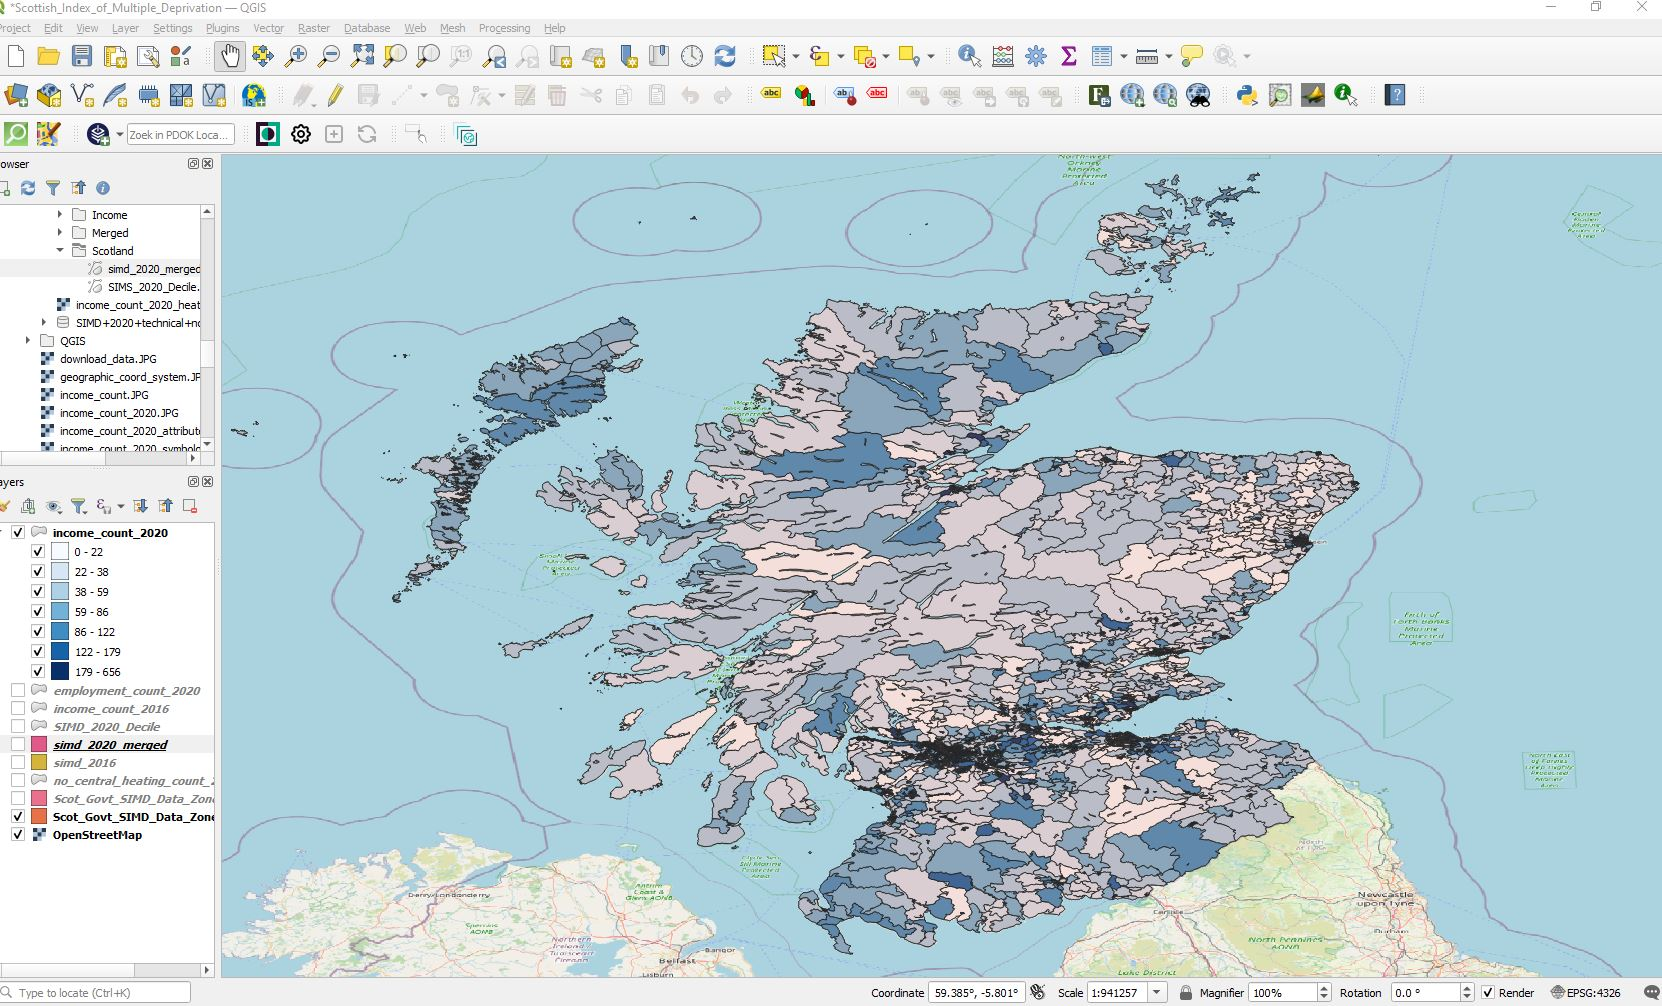

### Analysing changes in the SIMD over time 

I thought it would be a useful exercise to show the changes in the 2020 index against the 2016 index to get a picture of the changing deprivaiton landscape across data zones. 

#### ArcGis Space-Time Cube
I had hoped to harness the [Space-Time Cube](https://pro.arcgis.com/en/pro-app/latest/tool-reference/space-time-pattern-mining/learnmorecreatecube.htm) feature in ArcGis however very frustratingly you need to have a minimum of 10 time periods to use this feature!

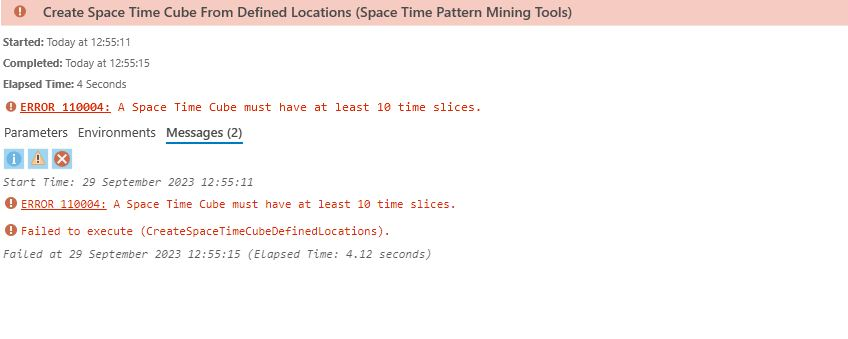


Also worthy of note. ArcGis requires a projected coordinate system and not a geographical coordinate system :

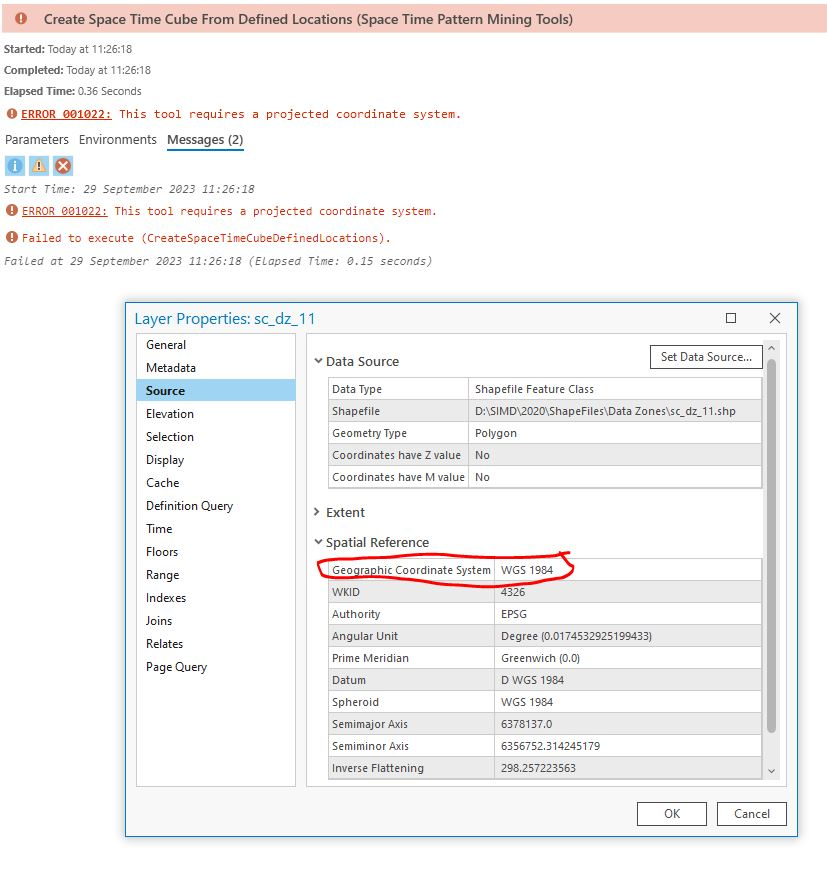

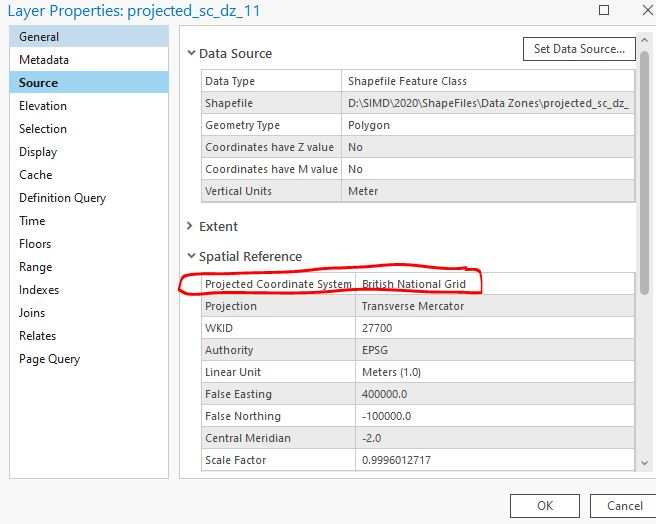

Another way to view changes between 2020 and 2016 would be to create maps for both years and view side by side. However the differences between two images can often be hard to detect. I had the idea of attempting to construct a "differences" dataset. Although this will require the 2020 and 2016 datsets to be consistent in terms of size and column names and might involve a lot of data wrangling, the end product - a **single** visualization of differences - would be worthwhile. Let's get started!

### SIMD 2016

Let's take a look at the data for 2016.

In [25]:
simd_2016 = pd.read_csv('data/simd2016_withinds.csv')
simd_2016.head()

Data_Zone Intermediate_Zone   Council_area  Total_population  \
0  S01006506            Culter  Aberdeen_City             904.0   
1  S01006507            Culter  Aberdeen_City             830.0   
2  S01006508            Culter  Aberdeen_City             694.0   
3  S01006509            Culter  Aberdeen_City             573.0   
4  S01006510            Culter  Aberdeen_City             676.0   

   Working_age_population_Revised  Overal_SIMD16_Rank  SIMD_2016_Percentile  \
0                           605.0              5272.0                  76.0   
1                           491.0              4838.0                  70.0   
2                           519.0              6321.0                  91.0   
3                           354.0              5363.0                  77.0   
4                           414.0              4049.0                  59.0   

   SIMD_2016_Vigintile  SIMD_2016_Decile  SIMD_2016_Quintile  ...  \
0                 16.0               8.0                 4.0  ...   
1                 14.0               7.0                 4.0  ...   
2                 19.0              10.0                 5.0  ...   
3                 16.0               8.0                 4.0  ...   
4                 12.0               6.0                 3.0  ...   

   drive_retail  drive_secondary  PT_GP  PT_Post  PT_retail  crime_rate  \
0           1.5             10.8    8.4      6.0        5.7          89   
1           2.7             11.5    8.3      7.3        6.8          48   
2           1.9             11.5    7.9      5.8        5.3          58   
3           2.2             10.8    7.4      8.3        8.4           0   
4           1.9             10.6    5.1      6.6        6.6         178   

   overcrowded_count nocentralheat_count  overcrowded_rate nocentralheat_rate  
0               87.0                10.0               10%                 1%  
1               85.0                 4.0               10%                 0%  
2               31.0                 8.0                5%                 1%  
3               42.0                 6.0                7%                 1%  
4               50.0                 7.0                9%                 1%  

[5 rows x 47 columns]

### A quick overview of our data

In [26]:
simd_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6979 entries, 0 to 6978
Data columns (total 47 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Data_Zone                           6979 non-null   object 
 1   Intermediate_Zone                   6976 non-null   object 
 2   Council_area                        6976 non-null   object 
 3   Total_population                    6976 non-null   float64
 4   Working_age_population_Revised      6976 non-null   float64
 5   Overal_SIMD16_Rank                  6976 non-null   float64
 6   SIMD_2016_Percentile                6976 non-null   float64
 7   SIMD_2016_Vigintile                 6976 non-null   float64
 8   SIMD_2016_Decile                    6976 non-null   float64
 9   SIMD_2016_Quintile                  6976 non-null   float64
 10  Income_Domain_2016_Rank             6976 non-null   float64
 11  Employment_Domain_2016_Rank         6976 no

In [28]:
nan_2016 = simd_2016.isna().sum().sort_values(ascending=False)
nan_2016

DRUG                                  3
drive_PO                              3
LBWT                                  3
EMERG                                 3
Attendance                            3
Attainment                            3
Noquals                               3
NEET                                  3
HESA                                  3
drive_petrol                          3
drive_GP                              3
drive_primary                         3
SMR                                   3
drive_retail                          3
drive_secondary                       3
PT_GP                                 3
PT_Post                               3
PT_retail                             3
crime_rate                            3
overcrowded_count                     3
nocentralheat_count                   3
overcrowded_rate                      3
DEPRESS                               3
nocentralheat_rate                    3
Intermediate_Zone                     3


In [30]:
number_nan_2016 = nan_2016.sum()

In [31]:
print(f'Our 2016 dataset contains {number_nan_2016} NaN values.')

Our 2016 dataset contains 138 NaN values.


In [32]:
# Check for columns containing '*'
columns_with_asterisk_2016 = simd_2016.columns[simd_2016.eq('*').any()]

# Print the columns containing '*'
print(columns_with_asterisk_2016)

Index(['CIF', 'DEPRESS', 'LBWT', 'Attainment', 'HESA', 'crime_rate'], dtype='object')


In [33]:
simd_2016 = simd_2016.replace('*', np.nan)

### Missing Data

In [34]:
# list number of missing values per column
simd_2016.isna().sum().sort_values(ascending=False)

Attainment                            17
HESA                                   6
DEPRESS                                5
CIF                                    5
crime_rate                             5
LBWT                                   4
drive_GP                               3
EMERG                                  3
Attendance                             3
Noquals                                3
NEET                                   3
drive_petrol                           3
DRUG                                   3
SMR                                    3
drive_primary                          3
drive_retail                           3
drive_secondary                        3
PT_GP                                  3
PT_Post                                3
PT_retail                              3
overcrowded_count                      3
nocentralheat_count                    3
overcrowded_rate                       3
drive_PO                               3
nocentralheat_ra

In [35]:
number_nan_2016 = simd_2016.isna().sum().sort_values(ascending=False)
updated_number_nan_2016 = number_nan_2016.sum()

In [36]:
print(f'Our updated 2016 dataset contains {updated_number_nan_2016} NaN values.')

Our updated 2016 dataset contains 162 NaN values.


In [37]:
simd_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6979 entries, 0 to 6978
Data columns (total 47 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Data_Zone                           6979 non-null   object 
 1   Intermediate_Zone                   6976 non-null   object 
 2   Council_area                        6976 non-null   object 
 3   Total_population                    6976 non-null   float64
 4   Working_age_population_Revised      6976 non-null   float64
 5   Overal_SIMD16_Rank                  6976 non-null   float64
 6   SIMD_2016_Percentile                6976 non-null   float64
 7   SIMD_2016_Vigintile                 6976 non-null   float64
 8   SIMD_2016_Decile                    6976 non-null   float64
 9   SIMD_2016_Quintile                  6976 non-null   float64
 10  Income_Domain_2016_Rank             6976 non-null   float64
 11  Employment_Domain_2016_Rank         6976 no

In [38]:
# Find columns containing '%' in their values
columns_with_percentage_values_2016 = simd_2016.applymap(lambda x: '%' in str(x)).any()

# Print the columns containing '%' in their values
print(columns_with_percentage_values_2016[columns_with_percentage_values_2016].index)

Index(['Income_rate', 'Employment_rate', 'DEPRESS', 'LBWT', 'Attendance',
       'NEET', 'HESA', 'overcrowded_rate', 'nocentralheat_rate'],
      dtype='object')


In [39]:
# Remove '%' from strings containing it
simd_2016 = simd_2016.applymap(lambda x: str(x).replace('%', '') if '%' in str(x) else x)
simd_2016.head()

Data_Zone Intermediate_Zone   Council_area  Total_population  \
0  S01006506            Culter  Aberdeen_City             904.0   
1  S01006507            Culter  Aberdeen_City             830.0   
2  S01006508            Culter  Aberdeen_City             694.0   
3  S01006509            Culter  Aberdeen_City             573.0   
4  S01006510            Culter  Aberdeen_City             676.0   

   Working_age_population_Revised  Overal_SIMD16_Rank  SIMD_2016_Percentile  \
0                           605.0              5272.0                  76.0   
1                           491.0              4838.0                  70.0   
2                           519.0              6321.0                  91.0   
3                           354.0              5363.0                  77.0   
4                           414.0              4049.0                  59.0   

   SIMD_2016_Vigintile  SIMD_2016_Decile  SIMD_2016_Quintile  ...  \
0                 16.0               8.0                 4.0  ...   
1                 14.0               7.0                 4.0  ...   
2                 19.0              10.0                 5.0  ...   
3                 16.0               8.0                 4.0  ...   
4                 12.0               6.0                 3.0  ...   

   drive_retail  drive_secondary  PT_GP  PT_Post  PT_retail  crime_rate  \
0           1.5             10.8    8.4      6.0        5.7          89   
1           2.7             11.5    8.3      7.3        6.8          48   
2           1.9             11.5    7.9      5.8        5.3          58   
3           2.2             10.8    7.4      8.3        8.4           0   
4           1.9             10.6    5.1      6.6        6.6         178   

   overcrowded_count nocentralheat_count  overcrowded_rate nocentralheat_rate  
0               87.0                10.0                10                  1  
1               85.0                 4.0                10                  0  
2               31.0                 8.0                 5                  1  
3               42.0                 6.0                 7                  1  
4               50.0                 7.0                 9                  1  

[5 rows x 47 columns]

In [40]:
# List of column names to convert to float
columns_to_convert_2016 = ['Income_rate', 'Employment_rate', 'CIF', 'ALCOHOL', 'DEPRESS', 'LBWT', 'Attendance', 'Attainment', 'NEET', 'HESA', 'crime_rate', 'overcrowded_rate', 'nocentralheat_rate']

# Use astype to convert the specified columns to float
simd_2016[columns_to_convert_2016] = simd_2016[columns_to_convert_2016].apply(pd.to_numeric, errors='coerce') 

In [41]:
# show rows which include null values
null_data_2016 = simd_2016[simd_2016.isnull().any(axis=1)]
null_data_2016

Data_Zone  \
137                                           S01006643   
140                                           S01006646   
2163                                          S01008669   
2343                                          S01008849   
2348                                          S01008854   
2644                                          S01009150   
3217                                          S01009723   
3505                                          S01010011   
3549                                          S01010055   
3700                                          S01010206   
3721                                          S01010227   
3758                                          S01010264   
3759                                          S01010265   
3767                                          S01010273   
3769                                          S01010275   
3867                                          S01010373   
5313                                          S01011819   
6976              # Error in the working age population   
6977  # In a previous version of this file we includ...   
6978  # SIMD16 ranks are not affected. For the calcu...   

                             Intermediate_Zone       Council_area  \
137                              Hanover_North      Aberdeen_City   
140                              George_Street      Aberdeen_City   
2163                     Meadows_and_Southside  City_of_Edinburgh   
2343                             New_Town_West  City_of_Edinburgh   
2348             Canonmills_and_New_Town_North  City_of_Edinburgh   
2644  Falkirk_-_Town_Centre_and_Callendar_Park            Falkirk   
3217                        St_Andrews_Central               Fife   
3505                             Mount_Florida       Glasgow_City   
3549             Parkhead_West_and_Barrowfield       Glasgow_City   
3700                                Petershill       Glasgow_City   
3721                                 Sighthill       Glasgow_City   
3758                          City_Centre_East       Glasgow_City   
3759                          City_Centre_East       Glasgow_City   
3767                         City_Centre_South       Glasgow_City   
3769                         City_Centre_South       Glasgow_City   
3867                              North_Kelvin       Glasgow_City   
5313                             West_Kirkwall     Orkney_Islands   
6976                                       NaN                NaN   
6977                                       NaN                NaN   
6978                                       NaN                NaN   

      Total_population  Working_age_population_Revised  Overal_SIMD16_Rank  \
137              782.0                           719.0              5566.0   
140             1001.0                           913.0              4907.0   
2163             532.0                           488.0              6564.0   
2343             694.0                           533.0              6499.0   
2348             932.0                           768.0              6937.0   
2644             759.0                           166.0               895.0   
3217             951.0                           834.0              6505.0   
3505             728.0                           508.0              1634.0   
3549            1200.0                           829.0                67.0   
3700               0.0                             0.0              4605.0   
3721               0.0                             0.0              5144.0   
3758             807.0                           726.0              1464.0   
3759             981.0                           941.0              5726.0   
3767             759.0                           714.0              5072.0   
3769             735.0                           697.0              4178.0   
3867             813.0                           648.0              5950.0   
5313             757.0        

In [42]:
simd_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6979 entries, 0 to 6978
Data columns (total 47 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Data_Zone                           6979 non-null   object 
 1   Intermediate_Zone                   6976 non-null   object 
 2   Council_area                        6976 non-null   object 
 3   Total_population                    6976 non-null   float64
 4   Working_age_population_Revised      6976 non-null   float64
 5   Overal_SIMD16_Rank                  6976 non-null   float64
 6   SIMD_2016_Percentile                6976 non-null   float64
 7   SIMD_2016_Vigintile                 6976 non-null   float64
 8   SIMD_2016_Decile                    6976 non-null   float64
 9   SIMD_2016_Quintile                  6976 non-null   float64
 10  Income_Domain_2016_Rank             6976 non-null   float64
 11  Employment_Domain_2016_Rank         6976 no

In [43]:
simd_2016.describe()

Total_population  Working_age_population_Revised  Overal_SIMD16_Rank  \
count       6976.000000                     6976.000000         6976.000000   
mean         766.571101                      493.098337         3488.500000   
std          188.267392                      151.225436         2013.942071   
min            0.000000                        0.000000            1.000000   
25%          635.000000                      397.000000         1744.750000   
50%          753.000000                      474.000000         3488.500000   
75%          877.000000                      563.000000         5232.250000   
max         3302.000000                     2917.000000         6976.000000   

       SIMD_2016_Percentile  SIMD_2016_Vigintile  SIMD_2016_Decile  \
count           6976.000000          6976.000000       6976.000000   
mean              50.500000            10.500000          5.500000   
std               28.868457             5.766794          2.872587   
min                1.000000             1.000000          1.000000   
25%               25.750000             5.750000          3.000000   
50%               50.500000            10.500000          5.500000   
75%               75.250000            15.250000          8.000000   
max              100.000000            20.000000         10.000000   

       SIMD_2016_Quintile  Income_Domain_2016_Rank  \
count         6976.000000              6976.000000   
mean             3.000000              3488.500000   
std              1.414214              2013.942071   
min              1.000000                 1.000000   
25%              2.000000              1744.750000   
50%              3.000000              3488.500000   
75%              4.000000              5232.250000   
max              5.000000              6975.500000   

       Employment_Domain_2016_Rank  Health_Domain_2016_Rank  ...  \
count                  6976.000000              6976.000000  ...   
mean                   3488.500000              3488.500000  ...   
std                    2013.942071              2013.942071  ...   
min                       1.000000                 1.000000  ...   
25%                    1744.750000              1744.750000  ...   
50%                    3488.500000              3488.500000  ...   
75%                    5232.250000              5232.250000  ...   
max                    6975.000000              6976.000000  ...   

       drive_retail  drive_secondary        PT_GP      PT_Post    PT_retail  \
count   6976.000000      6976.000000  6976.000000  6976.000000  6976.000000   
mean       5.238733         6.110751    10.266972     8.569696    13.532010   
std        6.131718         5.179672     6.182297     4.477807    10.660695   
min        0.700000         1.200000     1.600000     1.900000     1.900000   
25%        2.800000         3.700000     6.300000     5.600000     8.000000   
50%        4.000000         4.800000     8.800000     7.500000    11.200000   
75%        5.900000         6.700000    12.300000    10.200000    16.100000   
max      190.000000       116.100000   108.800000    40.300000   190.000000   

         crime_rate  overcrowded_count  nocentralheat_count  overcrowded_rate  \
count   6974.000000        6976.000000          6976.000000       6976.000000   
mean     311.808288          82.332569            13.430619         10.949828   
std      441.399811          63.921332            16.800241          7.879127   
min        0.000000           0.000000             0.000000          0.000000   
25%      103.000000          35.000000             3.000000          5.000000   
50%      207.000000          66.500000             8.000000          9.000000   
75%      388.000000         112.000000            17.000000         15.000000   
max    14580.000000         490.000000           187.000000         58.000000   

       nocentralheat_rate  
count         6976.000000  
mean             1.779960  
std              2.179844  
min       

In [44]:
simd_2016.overcrowded_count.value_counts()

28.0     80
36.0     77
34.0     77
51.0     76
31.0     73
         ..
338.0     1
252.0     1
490.0     1
332.0     1
242.0     1
Name: overcrowded_count, Length: 348, dtype: int64

### Raw stats

In [45]:
scotland_population_2016 = simd_2016.Total_population.sum()
scotland_working_age_populaton_2016 = simd_2016.Working_age_population_Revised.sum()
scotland_income_deprived_2016 = simd_2016.Income_count.sum()
scotland_employment_deprived_2016 = simd_2016.Employment_count.sum()
scotland_overcrowded_count_2016 = simd_2016.overcrowded_count.sum()
scotland_naeheating_count_2016 = simd_2016.nocentralheat_count.sum()

In [46]:
print(f'The total estimated population of Scotland in 2016 was: {scotland_population_2016}.')
print(f'The total estimated working age population of Scotland in 2016 was: {scotland_working_age_populaton_2016}.')
print(f"The total number of people classified as 'income deprived' in 2016 was: {scotland_income_deprived_2016}.")
print(f"The total number of people classified as living in 'overcrowded' conditions in 2016 was: {scotland_overcrowded_count_2016}.")
print(f"The total number of people classified as having no central heating in 2016 was: {scotland_naeheating_count_2016}.")

The total estimated population of Scotland in 2016 was: 5347600.0.
The total estimated working age population of Scotland in 2016 was: 3439854.0.
The total number of people classified as 'income deprived' in 2016 was: 659920.0.
The total number of people classified as living in 'overcrowded' conditions in 2016 was: 574352.0.
The total number of people classified as having no central heating in 2016 was: 93692.0.


In [47]:
# Rename colums to allow us to join on shared feature 
simd_2016.rename(columns={"Data_Zone": "DataZone"}, inplace=True)
simd_2016.head()

DataZone Intermediate_Zone   Council_area  Total_population  \
0  S01006506            Culter  Aberdeen_City             904.0   
1  S01006507            Culter  Aberdeen_City             830.0   
2  S01006508            Culter  Aberdeen_City             694.0   
3  S01006509            Culter  Aberdeen_City             573.0   
4  S01006510            Culter  Aberdeen_City             676.0   

   Working_age_population_Revised  Overal_SIMD16_Rank  SIMD_2016_Percentile  \
0                           605.0              5272.0                  76.0   
1                           491.0              4838.0                  70.0   
2                           519.0              6321.0                  91.0   
3                           354.0              5363.0                  77.0   
4                           414.0              4049.0                  59.0   

   SIMD_2016_Vigintile  SIMD_2016_Decile  SIMD_2016_Quintile  ...  \
0                 16.0               8.0                 4.0  ...   
1                 14.0               7.0                 4.0  ...   
2                 19.0              10.0                 5.0  ...   
3                 16.0               8.0                 4.0  ...   
4                 12.0               6.0                 3.0  ...   

   drive_retail  drive_secondary  PT_GP  PT_Post  PT_retail  crime_rate  \
0           1.5             10.8    8.4      6.0        5.7        89.0   
1           2.7             11.5    8.3      7.3        6.8        48.0   
2           1.9             11.5    7.9      5.8        5.3        58.0   
3           2.2             10.8    7.4      8.3        8.4         0.0   
4           1.9             10.6    5.1      6.6        6.6       178.0   

   overcrowded_count  nocentralheat_count  overcrowded_rate  \
0               87.0                 10.0              10.0   
1               85.0                  4.0              10.0   
2               31.0                  8.0               5.0   
3               42.0                  6.0               7.0   
4               50.0                  7.0               9.0   

   nocentralheat_rate  
0                 1.0  
1                 0.0  
2                 1.0  
3                 1.0  
4                 1.0  

[5 rows x 47 columns]

In [48]:
# merge geospatial datazones to non-spatial simd_2016
simd_2016_merged = datazones.merge(simd_2016, on='DataZone')
simd_2016_merged.head()

DataZone         Name  TotPop2011  ResPop2011  HHCnt2011   StdAreaHa  \
0  S01006506  Culter - 01         872         852        424  438.880218   
1  S01006507  Culter - 02         836         836        364   22.349739   
2  S01006508  Culter - 03         643         643        340   27.019476   
3  S01006509  Culter - 04         580         580        274    9.625426   
4  S01006510  Culter - 05         644         577        256   18.007657   

   StdAreaKm2    Shape_Leng    Shape_Area  \
0    4.388801  11801.872345  4.388802e+06   
1    0.223498   2900.406362  2.217468e+05   
2    0.270194   3468.761949  2.701948e+05   
3    0.096254   1647.461389  9.625426e+04   
4    0.180076   3026.111412  1.800766e+05   

                                            geometry  ... drive_retail  \
0  POLYGON ((-2.27748 57.09527, -2.27644 57.09521...  ...          1.5   
1  POLYGON ((-2.27354 57.10449, -2.27333 57.10449...  ...          2.7   
2  POLYGON ((-2.27443 57.10171, -2.27237 57.10046...  ...          1.9   
3  POLYGON ((-2.26611 57.10133, -2.26599 57.10092...  ...          2.2   
4  POLYGON ((-2.26013 57.10160, -2.26050 57.10134...  ...          1.9   

  drive_secondary  PT_GP  PT_Post  PT_retail  crime_rate  overcrowded_count  \
0            10.8    8.4      6.0        5.7        89.0               87.0   
1            11.5    8.3      7.3        6.8        48.0               85.0   
2            11.5    7.9      5.8        5.3        58.0               31.0   
3            10.8    7.4      8.3        8.4         0.0               42.0   
4            10.6    5.1      6.6        6.6       178.0               50.0   

   nocentralheat_count  overcrowded_rate  nocentralheat_rate  
0                 10.0              10.0                 1.0  
1                  4.0              10.0                 0.0  
2                  8.0               5.0                 1.0  
3                  6.0               7.0                 1.0  
4                  7.0               9.0                 1.0  

[5 rows x 56 columns]

In [49]:
simd_2016_merged.shape

(6976, 56)

In [50]:
simd_2020_merged.shape

(6976, 58)

### Data inconsistency

So, both sets have 6976 observations as expected (one for each Data Zone) but the 2020 dataset has an extra two columns. Let's investigate this further by using set theory to pinpoint the changes to the column names.

In [51]:
# convert column names into a set
set_columns_2016 = set(simd_2016_merged.columns)
set_columns_2016

{'ALCOHOL',
 'Attainment',
 'Attendance',
 'CIF',
 'Council_area',
 'Crime_Domain_2016_Rank',
 'DEPRESS',
 'DRUG',
 'DataZone',
 'EMERG',
 'Education_Domain_2016_Rank',
 'Employment_Domain_2016_Rank',
 'Employment_count',
 'Employment_rate',
 'Geographic_Access_Domain_2016_Rank',
 'HESA',
 'HHCnt2011',
 'Health_Domain_2016_Rank',
 'Housing_Domain_2016_Rank',
 'Income_Domain_2016_Rank',
 'Income_count',
 'Income_rate',
 'Intermediate_Zone',
 'LBWT',
 'NEET',
 'Name',
 'Noquals',
 'Overal_SIMD16_Rank',
 'PT_GP',
 'PT_Post',
 'PT_retail',
 'ResPop2011',
 'SIMD_2016_Decile',
 'SIMD_2016_Percentile',
 'SIMD_2016_Quintile',
 'SIMD_2016_Vigintile',
 'SMR',
 'Shape_Area',
 'Shape_Leng',
 'StdAreaHa',
 'StdAreaKm2',
 'TotPop2011',
 'Total_population',
 'Working_age_population_Revised',
 'crime_rate',
 'drive_GP',
 'drive_PO',
 'drive_petrol',
 'drive_primary',
 'drive_retail',
 'drive_secondary',
 'geometry',
 'nocentralheat_count',
 'nocentralheat_rate',
 'overcrowded_count',
 'overcrowded_rat

In [52]:
# convert colum names into a set
set_columns_2020 = set(simd_2020_merged.columns)
set_columns_2020

{'ALCOHOL',
 'Attainment',
 'Attendance',
 'CIF',
 'Council_area',
 'DEPRESS',
 'DRUG',
 'DataZone',
 'EMERG',
 'HHCnt2011',
 'Intermediate_Zone',
 'LBWT',
 'Name',
 'PT_GP',
 'PT_post',
 'PT_retail',
 'ResPop2011',
 'SIMD2020_Access_Domain_Rank',
 'SIMD2020_Crime_Domain_Rank',
 'SIMD2020_Education_Domain_Rank',
 'SIMD2020_Employment_Domain_Rank',
 'SIMD2020_Health_Domain_Rank',
 'SIMD2020_Housing_Domain_Rank',
 'SIMD2020v2_Decile',
 'SIMD2020v2_Income_Domain_Rank',
 'SIMD2020v2_Quintile',
 'SIMD2020v2_Rank',
 'SIMD2020v2_Vigintile',
 'SIMD_2020v2_Percentile',
 'SMR',
 'Shape_Area',
 'Shape_Leng',
 'StdAreaHa',
 'StdAreaKm2',
 'TotPop2011',
 'Total_population',
 'University',
 'Working_Age_population',
 'broadband',
 'crime_count',
 'crime_rate',
 'drive_GP',
 'drive_petrol',
 'drive_post',
 'drive_primary',
 'drive_retail',
 'drive_secondary',
 'employment_count',
 'employment_rate',
 'geometry',
 'income_count',
 'income_rate',
 'no_qualifications',
 'nocentralheating_count',
 'nocen

In [53]:
# Find columns unique to set_2020
unique_to_columns_2020 = set_columns_2020 - set_columns_2016
unique_to_columns_2020

{'PT_post',
 'SIMD2020_Access_Domain_Rank',
 'SIMD2020_Crime_Domain_Rank',
 'SIMD2020_Education_Domain_Rank',
 'SIMD2020_Employment_Domain_Rank',
 'SIMD2020_Health_Domain_Rank',
 'SIMD2020_Housing_Domain_Rank',
 'SIMD2020v2_Decile',
 'SIMD2020v2_Income_Domain_Rank',
 'SIMD2020v2_Quintile',
 'SIMD2020v2_Rank',
 'SIMD2020v2_Vigintile',
 'SIMD_2020v2_Percentile',
 'University',
 'Working_Age_population',
 'broadband',
 'crime_count',
 'drive_post',
 'employment_count',
 'employment_rate',
 'income_count',
 'income_rate',
 'no_qualifications',
 'nocentralheating_count',
 'nocentralheating_rate',
 'not_participating'}

In [54]:
# Find columns unique to set_2016
unique_to_columns_2016 = set_columns_2016 - set_columns_2020
unique_to_columns_2016

{'Crime_Domain_2016_Rank',
 'Education_Domain_2016_Rank',
 'Employment_Domain_2016_Rank',
 'Employment_count',
 'Employment_rate',
 'Geographic_Access_Domain_2016_Rank',
 'HESA',
 'Health_Domain_2016_Rank',
 'Housing_Domain_2016_Rank',
 'Income_Domain_2016_Rank',
 'Income_count',
 'Income_rate',
 'NEET',
 'Noquals',
 'Overal_SIMD16_Rank',
 'PT_Post',
 'SIMD_2016_Decile',
 'SIMD_2016_Percentile',
 'SIMD_2016_Quintile',
 'SIMD_2016_Vigintile',
 'Working_age_population_Revised',
 'drive_PO',
 'nocentralheat_count',
 'nocentralheat_rate'}

### Rename columns

In [55]:
simd_2020_merged.rename(columns={'SIMD2020_Access_Domain_Rank': 'Access_Domain_Rank',
 'SIMD2020_Crime_Domain_Rank': 'Crime_Domain_Rank',
 'SIMD2020_Education_Domain_Rank':'Education_Domain_Rank',
 'SIMD2020_Employment_Domain_Rank': 'Employment_Domain_Rank',
 'SIMD2020_Health_Domain_Rank':'Health_Domain_Rank',
 'SIMD2020_Housing_Domain_Rank':'Housing_Domain_Rank',
 'SIMD2020v2_Decile':'Decile',
 'SIMD2020v2_Income_Domain_Rank':'Income_Domain_Rank',
 'SIMD2020v2_Quintile':'Quintile',
 'SIMD2020v2_Rank':'Rank',
 'SIMD2020v2_Vigintile': 'Vigintile',
 'SIMD_2020v2_Percentile':'Percentile'},inplace=True)

simd_2020_merged

DataZone                 Name  TotPop2011  ResPop2011  HHCnt2011  \
0     S01006506          Culter - 01         872         852        424   
1     S01006507          Culter - 02         836         836        364   
2     S01006508          Culter - 03         643         643        340   
3     S01006509          Culter - 04         580         580        274   
4     S01006510          Culter - 05         644         577        256   
...         ...                  ...         ...         ...        ...   
6971  S01013477  Broxburn South - 06         605         605        303   
6972  S01013478   Broxburn East - 01         860         851        358   
6973  S01013479   Broxburn East - 02         786         781        428   
6974  S01013480   Broxburn East - 03         671         671        302   
6975  S01013481   Broxburn East - 04         451         451        189   

       StdAreaHa  StdAreaKm2    Shape_Leng    Shape_Area  \
0     438.880218    4.388801  11801.872345  4.388802e+06   
1      22.349739    0.223498   2900.406362  2.217468e+05   
2      27.019476    0.270194   3468.761949  2.701948e+05   
3       9.625426    0.096254   1647.461389  9.625426e+04   
4      18.007657    0.180076   3026.111412  1.800766e+05   
...          ...         ...           ...           ...   
6971   10.988164    0.109882   1775.782199  1.098816e+05   
6972   12.438169    0.124382   2319.192976  1.243817e+05   
6973   26.714576    0.267145   3234.544766  2.671458e+05   
6974    9.624700    0.096248   1598.577583  9.624701e+04   
6975  511.606694    5.116068  13900.390027  5.116067e+06   

                                               geometry  ... drive_petrol  \
0     POLYGON ((-2.27748 57.09527, -2.27644 57.09521...  ...     2.540103   
1     POLYGON ((-2.27354 57.10449, -2.27333 57.10449...  ...     3.915072   
2     POLYGON ((-2.27443 57.10171, -2.27237 57.10046...  ...     3.323025   
3     POLYGON ((-2.26611 57.10133, -2.26599 57.10092...  ...     2.622991   
4     POLYGON ((-2.26013 57.10160, -2.26050 57.10134...  ...     2.115004   
...                                                 ...  ...          ...   
6971  POLYGON ((-3.46323 55.93434, -3.46319 55.93408...  ...     2.732500   
6972  POLYGON ((-3.48355 55.93733, -3.48354 55.93728...  ...     5.227738   
6973  POLYGON ((-3.46664 55.93627, -3.46652 55.93622...  ...     3.664326   
6974  POLYGON ((-3.46259 55.93774, -3.46243 55.93725...  ...     3.251885   
6975  POLYGON ((-3.44318 55.93923, -3.44285 55.93909...  ...     2.330493   

      drive_GP  drive_post  drive_primary  drive_retail  drive_secondary  \
0     3.074295    1.616239       2.615747      1.544260         9.930833   
1     4.309812    2.555858       3.646697      2.849656        11.042816   
2     3.784549    1.440991       3.247325      2.062255        10.616768   
3     2.778026    2.620681       1.936908      2.160142        10.036471   
4     2.358335    2.408416       1.845672      1.784635         9.650000   
...        ...         ...            ...           ...              ...   
6971  3.706674    1.690504       3.148465      1.559616         5.930057   
6972  1.922628    1.977860       2.979797      2.815971         3.425031   
6973  3.613521    1.657220       2.530326      1.445423         5.912698   
6974  4.625972    2.600421       3.541645      2.127917         6.626376   
6975  4.745421    2.732700       4.283480      2.577007         7.106607   

          PT_GP   PT_post  PT_retail  broadband  
0      8.863589  5.856135   6.023406       11.0  
1      9.978272  7.515000   7.926029        1.0  
2      8.620700  4.321493   5.770910        1.0  
3      7.935112  8.433328   8.329819       11.0  
4      5.568964  6.966429   6.632609        0.0  
...         ...       ...        ...        ...  
6971   7.693930  4.175574   4.284855        0.0  
6972   6.550913  6.485256   7.598948        0.0  
6973   7.355121  4.006667   4.412252        1.0  
6974  10.176170  6.409534   6.928539        0.0

In [56]:
simd_2016_merged.rename(columns={'Crime_Domain_2016_Rank': 'Crime_Domain_Rank' ,
 'Education_Domain_2016_Rank':'Education_Domain_Rank',
 'Employment_Domain_2016_Rank': 'Employment_Domain_Rank',
 'Employment_count':'employment_count',
 'Employment_rate':'employment_rate',
 'Geographic_Access_Domain_2016_Rank': 'Access_Domain_Rank',
 'HESA':'University',
 'Health_Domain_2016_Rank': 'Health_Domain_Rank',
 'Housing_Domain_2016_Rank':'Housing_Domain_Rank',
 'Income_Domain_2016_Rank':'Income_Domain_Rank',
 'Income_count':'income_count',
 'Income_rate':'income_rate',
 'NEET':'not_participating',
 'Noquals':'no_qualifications',
 'Overal_SIMD16_Rank':'Rank',
 'PT_Post':'PT_post',
 'SIMD_2016_Decile': 'Decile',
 'SIMD_2016_Percentile': 'Percentile',
 'SIMD_2016_Quintile':'Quintile',
 'SIMD_2016_Vigintile':'Vigintile',
 'Working_age_population_Revised':'Working_Age_population',
 'drive_PO':'drive_post',
 'nocentralheat_count':'nocentralheating_count',
 'nocentralheat_rate':'nocentralheating_rate'},
                 inplace=True)

simd_2016_merged

DataZone                 Name  TotPop2011  ResPop2011  HHCnt2011  \
0     S01006506          Culter - 01         872         852        424   
1     S01006507          Culter - 02         836         836        364   
2     S01006508          Culter - 03         643         643        340   
3     S01006509          Culter - 04         580         580        274   
4     S01006510          Culter - 05         644         577        256   
...         ...                  ...         ...         ...        ...   
6971  S01013477  Broxburn South - 06         605         605        303   
6972  S01013478   Broxburn East - 01         860         851        358   
6973  S01013479   Broxburn East - 02         786         781        428   
6974  S01013480   Broxburn East - 03         671         671        302   
6975  S01013481   Broxburn East - 04         451         451        189   

       StdAreaHa  StdAreaKm2    Shape_Leng    Shape_Area  \
0     438.880218    4.388801  11801.872345  4.388802e+06   
1      22.349739    0.223498   2900.406362  2.217468e+05   
2      27.019476    0.270194   3468.761949  2.701948e+05   
3       9.625426    0.096254   1647.461389  9.625426e+04   
4      18.007657    0.180076   3026.111412  1.800766e+05   
...          ...         ...           ...           ...   
6971   10.988164    0.109882   1775.782199  1.098816e+05   
6972   12.438169    0.124382   2319.192976  1.243817e+05   
6973   26.714576    0.267145   3234.544766  2.671458e+05   
6974    9.624700    0.096248   1598.577583  9.624701e+04   
6975  511.606694    5.116068  13900.390027  5.116067e+06   

                                               geometry  ... drive_retail  \
0     POLYGON ((-2.27748 57.09527, -2.27644 57.09521...  ...          1.5   
1     POLYGON ((-2.27354 57.10449, -2.27333 57.10449...  ...          2.7   
2     POLYGON ((-2.27443 57.10171, -2.27237 57.10046...  ...          1.9   
3     POLYGON ((-2.26611 57.10133, -2.26599 57.10092...  ...          2.2   
4     POLYGON ((-2.26013 57.10160, -2.26050 57.10134...  ...          1.9   
...                                                 ...  ...          ...   
6971  POLYGON ((-3.46323 55.93434, -3.46319 55.93408...  ...          1.5   
6972  POLYGON ((-3.48355 55.93733, -3.48354 55.93728...  ...          2.5   
6973  POLYGON ((-3.46664 55.93627, -3.46652 55.93622...  ...          1.4   
6974  POLYGON ((-3.46259 55.93774, -3.46243 55.93725...  ...          2.1   
6975  POLYGON ((-3.44318 55.93923, -3.44285 55.93909...  ...          2.4   

     drive_secondary  PT_GP  PT_post  PT_retail  crime_rate  \
0               10.8    8.4      6.0        5.7        89.0   
1               11.5    8.3      7.3        6.8        48.0   
2               11.5    7.9      5.8        5.3        58.0   
3               10.8    7.4      8.3        8.4         0.0   
4               10.6    5.1      6.6        6.6       178.0   
...              ...    ...      ...        ...         ...   
6971             5.5    7.3      4.9        4.8       648.0   
6972             3.3    6.7      7.3        7.8       238.0   
6973             5.4    7.2      4.3        4.2       597.0   
6974             6.3    8.2      5.9        6.2       167.0   
6975             6.2   11.5      8.8        9.4       302.0   

      overcrowded_count  nocentralheating_count  overcrowded_rate  \
0                  87.0                    10.0              10.0   
1                  85.0                     4.0              10.0   
2                  31.0                     8.0               5.0   
3                  42.0                     6.0               7.0   
4                  50.0                     7.0               9.0   
...                 ...                     ...               ...   
6971               93.0                    10.0              15.0   
6972               87.0                     1.0              10.0   
6973               96.0                     9.0              12.0   
6974         

Let's check to see if there are any more column inconsistencies :

In [57]:
# convert colum names into a set
set_columns_2020 = set(simd_2020_merged.columns)
set_columns_2016 = set(simd_2016_merged.columns)
unique_to_columns_2020 = set_columns_2020 - set_columns_2016
unique_to_columns_2020

{'broadband', 'crime_count'}

In [58]:
unique_to_columns_2016 = set_columns_2016 - set_columns_2020
unique_to_columns_2016

set()

So, the only differences are that 2020 introduced a new indicator `broadband` and there is no `crime_count` column for 2016 contrary to the indicator description. Let's drop these columns and proceed.

In [59]:
# remove the columns
simd_2020_merged.drop(columns=['broadband', 'crime_count'], inplace=True)

Excellent. So we now have consistent 2020 and 2016 datasets. Let's create a new dataset of differences. 

In [60]:
simd_2020_merged.columns

Index(['DataZone', 'Name', 'TotPop2011', 'ResPop2011', 'HHCnt2011',
       'StdAreaHa', 'StdAreaKm2', 'Shape_Leng', 'Shape_Area', 'geometry',
       'Intermediate_Zone', 'Council_area', 'Total_population',
       'Working_Age_population', 'Rank', 'Percentile', 'Vigintile', 'Decile',
       'Quintile', 'Income_Domain_Rank', 'Employment_Domain_Rank',
       'Health_Domain_Rank', 'Education_Domain_Rank', 'Access_Domain_Rank',
       'Crime_Domain_Rank', 'Housing_Domain_Rank', 'income_rate',
       'income_count', 'employment_rate', 'employment_count', 'CIF', 'ALCOHOL',
       'DRUG', 'SMR', 'DEPRESS', 'LBWT', 'EMERG', 'Attendance', 'Attainment',
       'no_qualifications', 'not_participating', 'University', 'crime_rate',
       'overcrowded_count', 'nocentralheating_count', 'overcrowded_rate',
       'nocentralheating_rate', 'drive_petrol', 'drive_GP', 'drive_post',
       'drive_primary', 'drive_retail', 'drive_secondary', 'PT_GP', 'PT_post',
       'PT_retail'],
      dtype='object')

In [61]:
diff_columns = ['Total_population',
       'Working_Age_population', 'Rank', 'Percentile', 'Vigintile', 'Decile',
       'Quintile', 'Income_Domain_Rank', 'Employment_Domain_Rank',
       'Health_Domain_Rank', 'Education_Domain_Rank', 'Access_Domain_Rank',
       'Crime_Domain_Rank', 'Housing_Domain_Rank', 'income_rate',
       'income_count', 'employment_rate', 'employment_count', 'CIF', 'ALCOHOL',
       'DRUG', 'SMR', 'DEPRESS', 'LBWT', 'EMERG', 'Attendance', 'Attainment',
       'no_qualifications', 'not_participating', 'University', 'crime_rate',
       'overcrowded_count', 'nocentralheating_count', 'overcrowded_rate',
       'nocentralheating_rate', 'drive_petrol', 'drive_GP', 'drive_post',
       'drive_primary', 'drive_retail', 'drive_secondary', 'PT_GP', 'PT_post',
       'PT_retail']

In [ ]:
simd_2020_merged.set_index('DataZone', inplace=True)
simd_2016_merged.set_index('DataZone', inplace=True)

In [62]:
# Ensure both dataframes have the same columns and are in the same order
simd_2020_merged = simd_2020_merged[diff_columns]
simd_2016_merged = simd_2016_merged[diff_columns]

In [65]:
simd_diff_2016_2020 = simd_2020_merged - simd_2016_merged
simd_diff_2016_2020

Total_population  Working_Age_population    Rank  Percentile  Vigintile  \
0                -10.0                   -25.0  -581.0        -8.0       -2.0   
1                -37.0                   -21.0    24.0         0.0        0.0   
2                -70.0                   -58.0  -635.0        -9.0       -2.0   
3                -36.0                   -47.0 -1031.0       -14.0       -3.0   
4                -13.0                     1.0  -136.0        -2.0        0.0   
...                ...                     ...     ...         ...        ...   
6971              -8.0                   -29.0   271.0         4.0        1.0   
6972             -26.0                   -23.0   473.0         7.0        1.0   
6973              -5.0                   -27.0  -218.0        -3.0        0.0   
6974              14.0                    28.0   570.0         9.0        2.0   
6975              -3.0                     9.0   958.0        14.0        3.0   

      Decile  Quintile  Income_Domain_Rank  Employment_Domain_Rank  \
0       -1.0       0.0              -577.0                 -1040.0   
1        0.0       0.0               495.0                  -349.0   
2       -1.0       0.0              -806.0                  -991.0   
3       -1.0       0.0             -1521.0                 -1370.0   
4        0.0       0.0                 3.0                  -607.0   
...      ...       ...                 ...                     ...   
6971     0.0       0.0               465.0                   434.0   
6972     1.0       0.0               699.0                   629.0   
6973     0.0       0.0               215.5                  -346.0   
6974     1.0       1.0                69.5                   233.5   
6975     1.0       0.0               922.5                  1981.0   

      Health_Domain_Rank  ...  nocentralheating_rate  drive_petrol  drive_GP  \
0                  268.0  ...                    0.0      0.140103  0.174295   
1                  -19.0  ...                    0.0      0.215072  0.309812   
2                  105.0  ...                    0.0      0.123025  0.184549   
3                  -87.0  ...                    0.0      0.122991  0.278026   
4                   21.0  ...                    0.0      0.015004  0.158335   
...                  ...  ...                    ...           ...       ...   
6971               414.0  ...                    0.0      0.132500  0.306674   
6972               202.0  ...                    0.0      0.527738  0.122628   
6973              -571.0  ...                    0.0      0.164326  0.313521   
6974               799.0  ...                    0.0      0.151885  0.525972   
6975               946.0  ...                    0.0      0.130493  0.645421   

      drive_post  drive_primary  drive_retail  drive_secondary     PT_GP  \
0       0.116239       0.615747      0.044260        -0.869167  0.463589   
1      -0.144142       0.546697      0.149656        -0.457184  1.678272   
2      -0.659009       0.547325      0.162255        -0.883232  0.720700   
3       0.620681       0.536908     -0.039858        -0.763529  0.535112   
4       0.708416       0.345672     -0.115365        -0.950000  0.468964   
...          ...            ...           ...              ...       ...   
6971   -0.209496       0.648465      0.059616         0.430057  0.393930   
6972   -0.222140       1.079797      0.315971         0.125031 -0.149087   
6973   -0.142780       0.130326      0.045423         0.512698  0.155121   
6974    0.000421       0.341645      0.027917         0.326376  1.976170   
6975    0.132700       0.883480      0.177007         0.906607 -0.030798   

       PT_post  PT_retail  
0    -0.143865   0.323406  
1     0.215000   1.126029  
2    -1.478507   0.470910  
3     0.133328  -0.070181  
4     0.366429   0.032609  
...        ...        ...  
6971 -0.724426  -0.515145  
6972 -0.814744  -0.201052  
6973 -0.293333   0.212252  
6974  0.509534   0.728539  
6975 -0.91

### Save to a csv

In [66]:
simd_diff_2016_2020.to_csv("simd_diff_2016_2020.csv", index=False)

## ArcGis

As part of the Esri MOOC ***Spatial Data Science: The New Frontier in Analytics*** I have access to ArcGis Pro and discovered the Optimized Hot Spot and Outlier analysis tools. Let's now see those tools in action.

### Detect patterns

Statistical cluster analysis can help you minimize the subjectivity in your maps by identifying meaningful clusters in your data. The Hot Spot Analysis and Outlier Analysis tools use statistics to detect spatial patterns in your data, but each provides slightly different information about these patterns.

ArcGIS provides traditional and optimized statistical cluster analysis tools. The optimized tools interrogate your data to provide smart default values, optimizing the analysis workflow. The traditional tools allow you more flexibility in defining the spatial relationships in your data, giving you more control over your analysis. 

### Optimized Hot Spot Analysis

The `Hot Spot Analysis` tool uses the **Getis-Ord Gi*** statistic to identify statistically significant spatial clusters of high values (hot spots) and low values (cold spots).

The result of your analysis is a layer displaying hot spots in three shades of red and cold spots in three shades of blue. The varying shades correspond to three confidence intervals, indicating how confident you can be that these patterns are not the result of random chance.


#### Income Deprived - 2020 - Hotspot Analysis

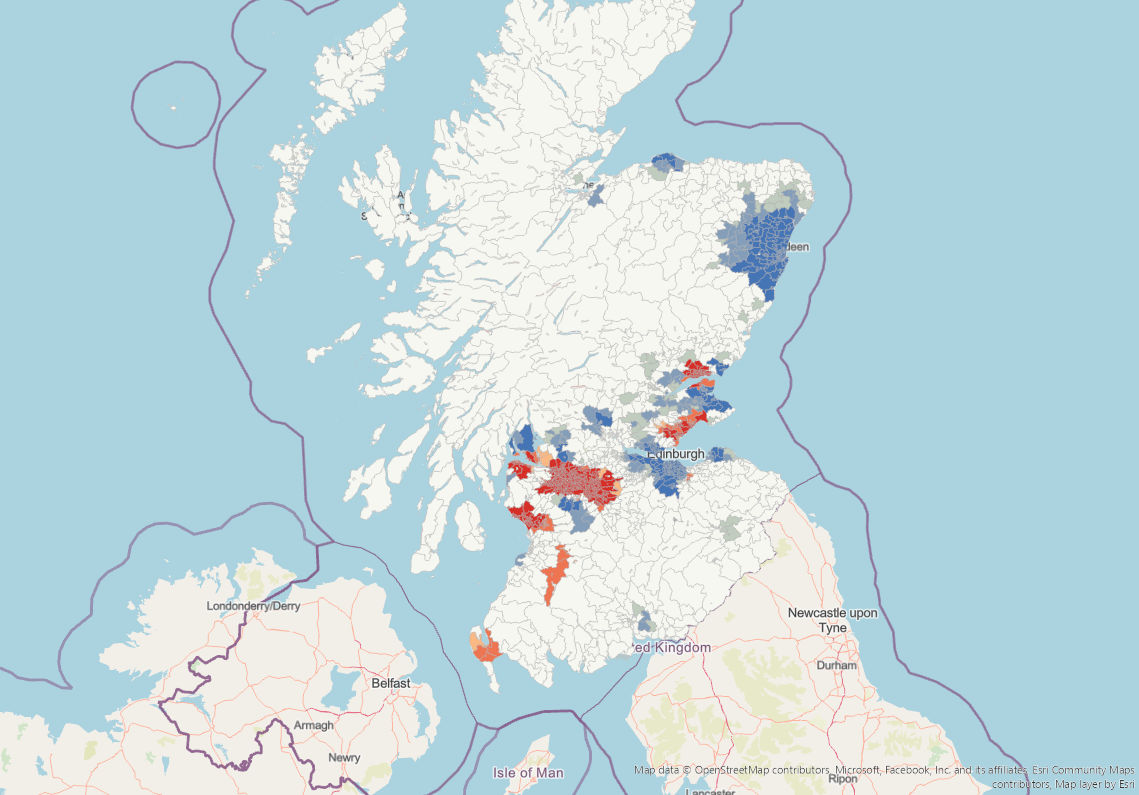


We can clearly see that large parts of the Glasgow area, significant pockets of Edinburgh and Dundee, and a pocket of Aberdeen are shown to be income deprived hotspots. 


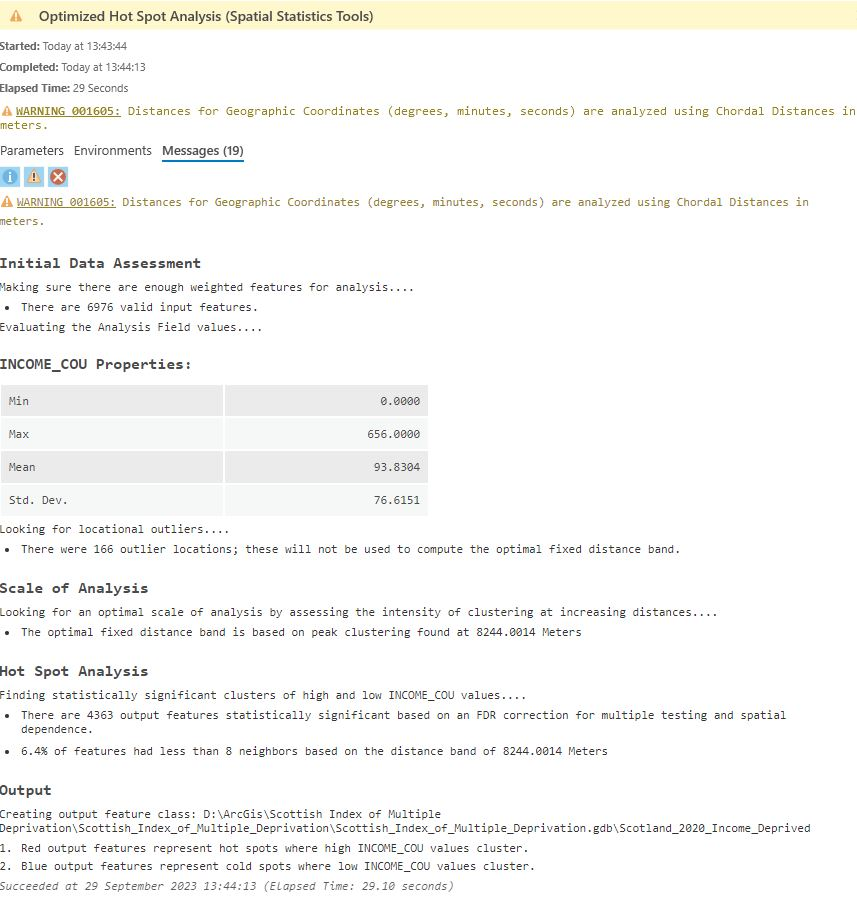

#### Employment Deprived - 2020 - Hotspot Analysis

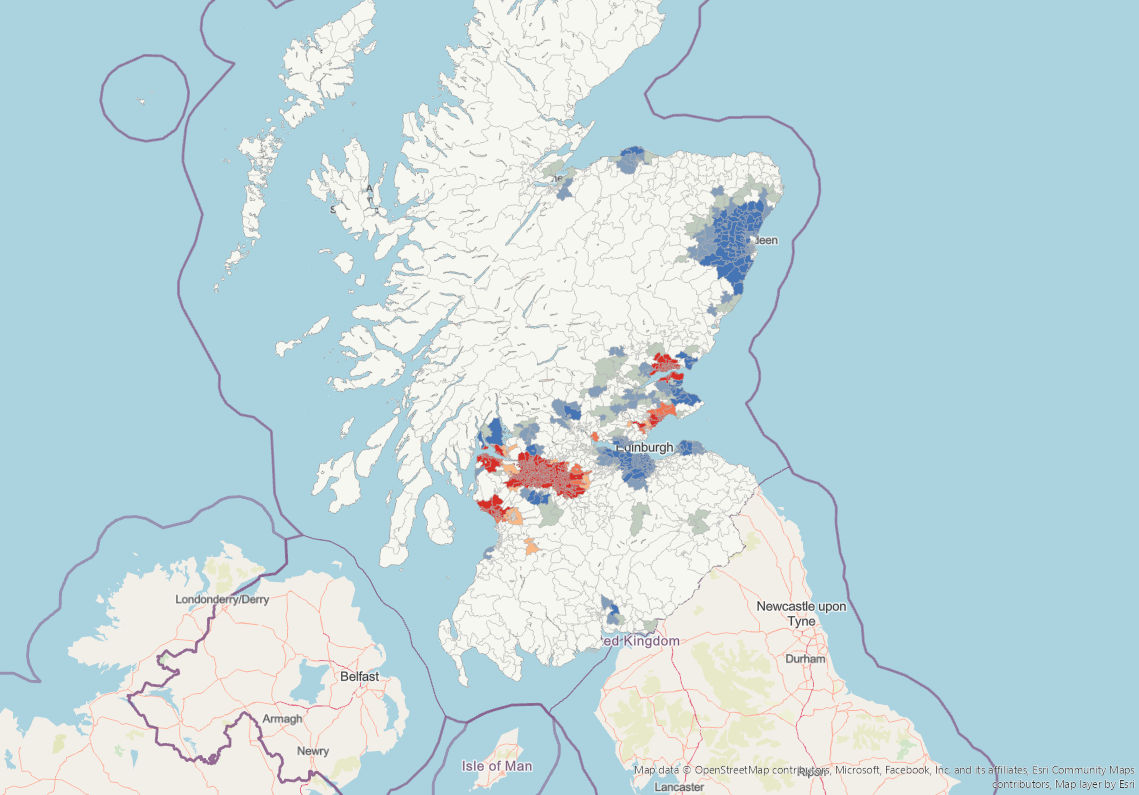

Interestingly the Aberdeen pocket of Income Deprived is not replicated when it comes to Employment. The Glasgow, Edinburgh and Dundee pattern broadly resembles that for income deprivation.


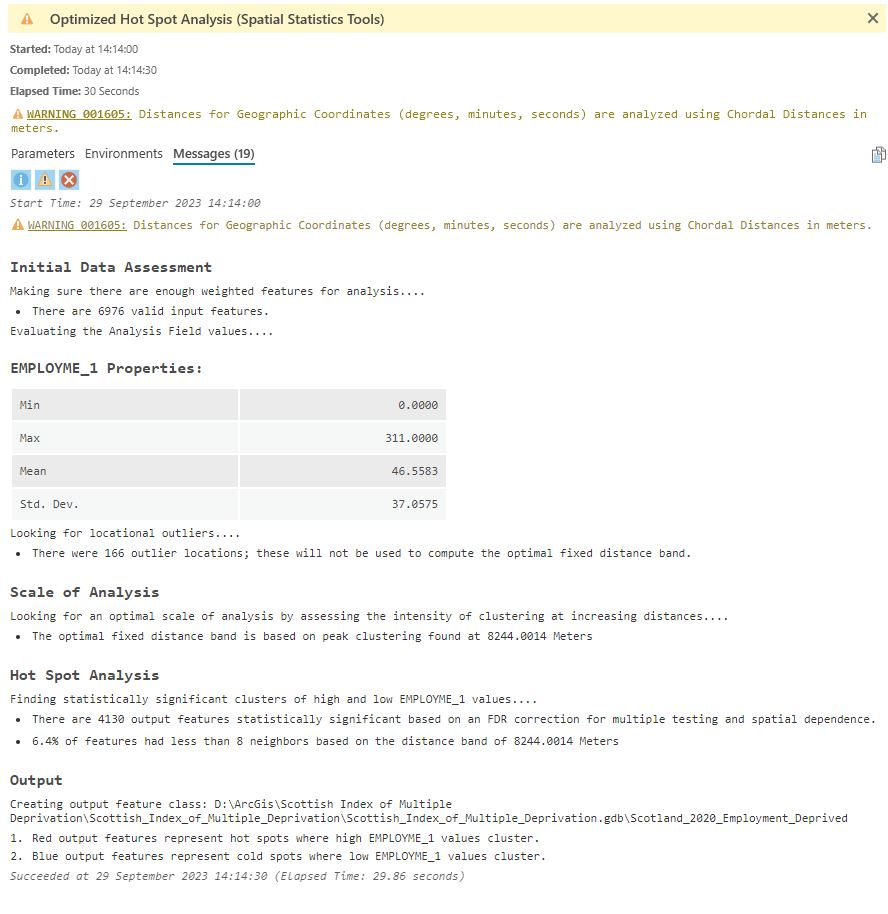

#### Overcrowded - 2020 - Hotspot Analysis

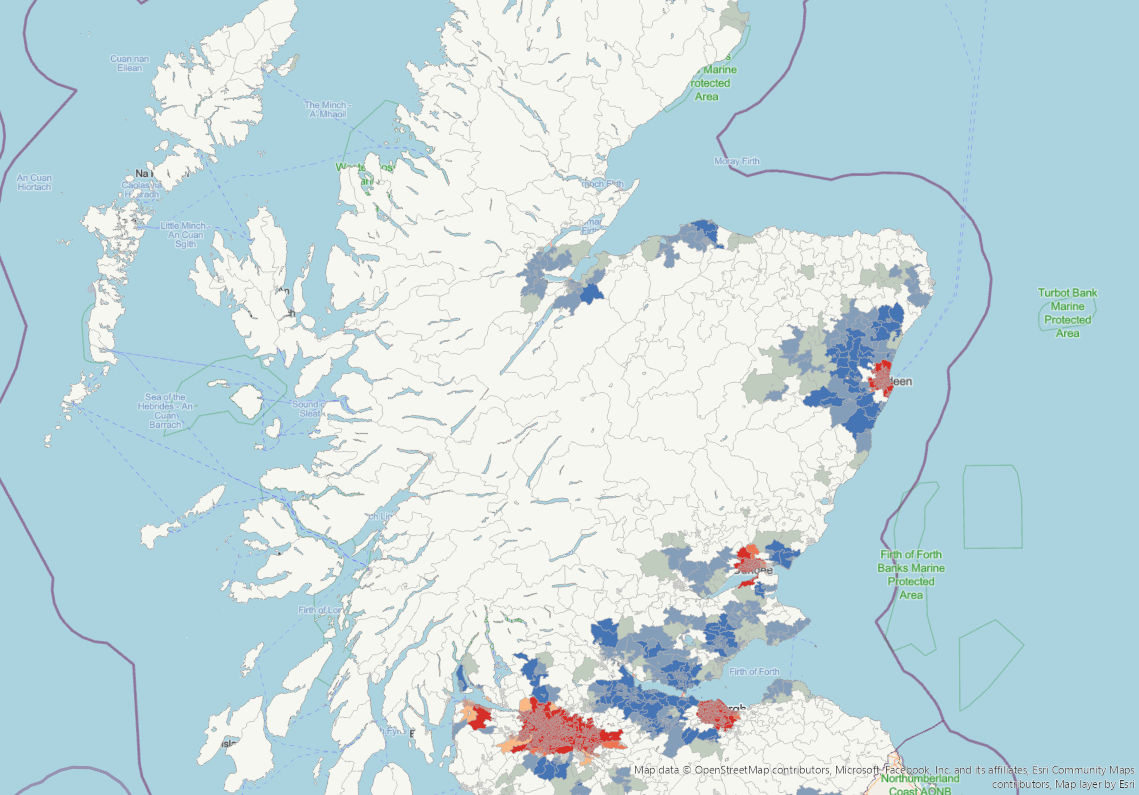

As one might expect, the four main cities are overcrowding hotspots, emphasizing the continuing need for new affordable housing.

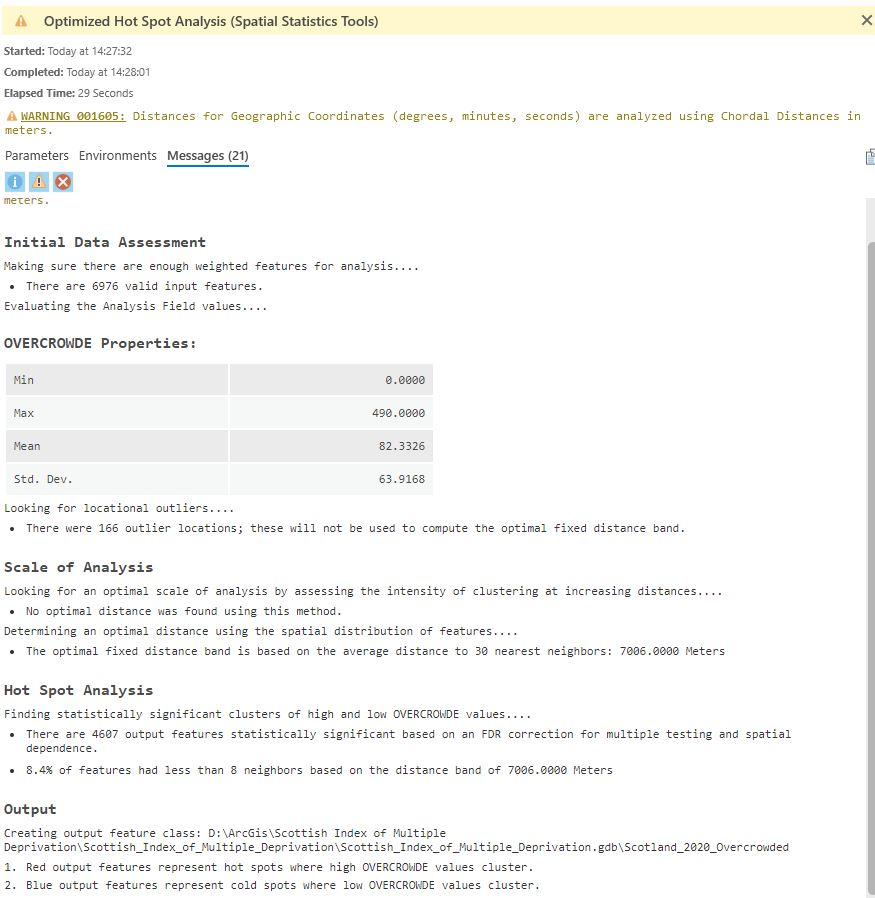

#### Drivetime to GP surgery - 2020 - Hotspot Analysis

Ready and speedy access to healthcare is critical. The four major cities, Glasgow, Edinburgh, Aberdeen, and Dundee all have quick access to a GP, however large swathes of the country are vulnerable as illustrated by the follwowing graphic, and highlights the challenge faced by government to ensure that rural communities are serviced.

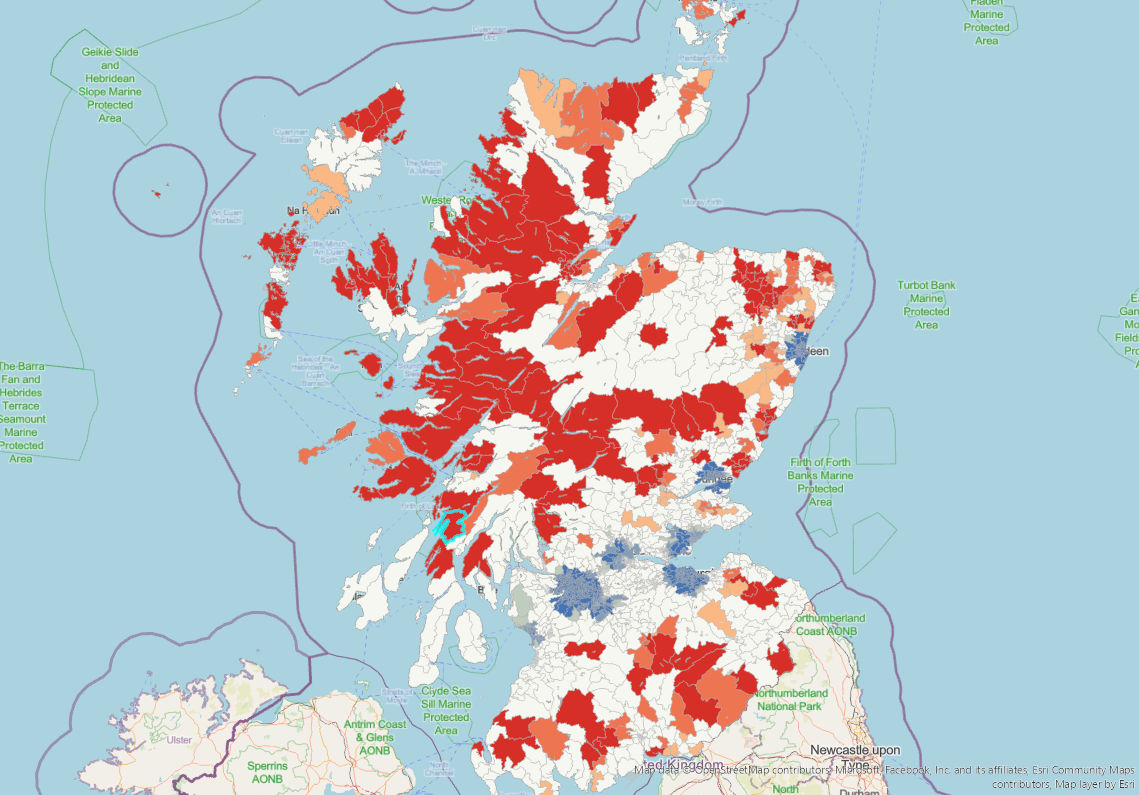

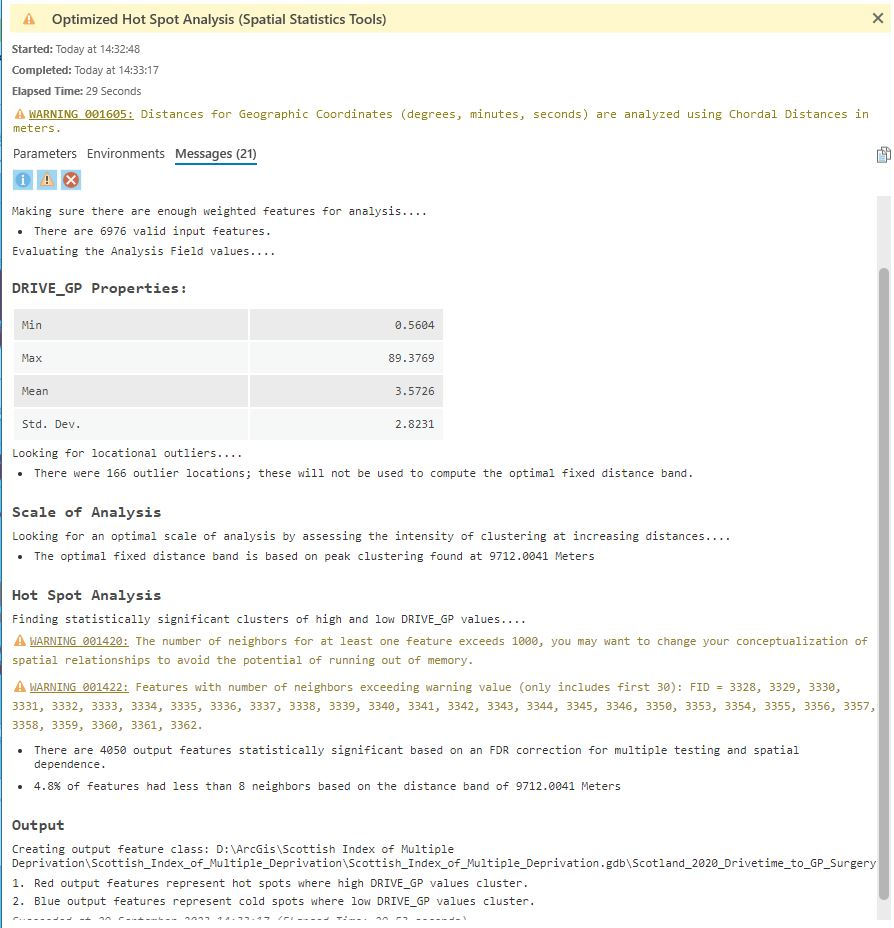

Now that we have seen some examples of hotspot areas in Scotland with respect to certain indicators, let's now turn our attention to Outlier Analysis.

### Outlier Analysis
The `Outlier Analysis` tool uses the **Anselin Local Moran's I** statistic to identify statistically significant clusters of high and low values and to detect spatial outliers, or features with values that are significantly dissimilar from their neighbors.

The bright red and blue features represent spatial outliers. Features with high values surrounded by areas with low values are called `High-Low` outliers and are displayed in `red`. Features with low values surrounded by areas with high values are called `Low-High` outliers and are displayed in `dark blue`. The pink and light blue colors indicate clusters of features with statistically significantly high values (pink) and statistically significantly low values (light blue). These clusters typically align with the hot spots and cold spots from the Optimized Hot Spot Analysis tool.

#### Income Deprived - 2020 - Outlier Analysis

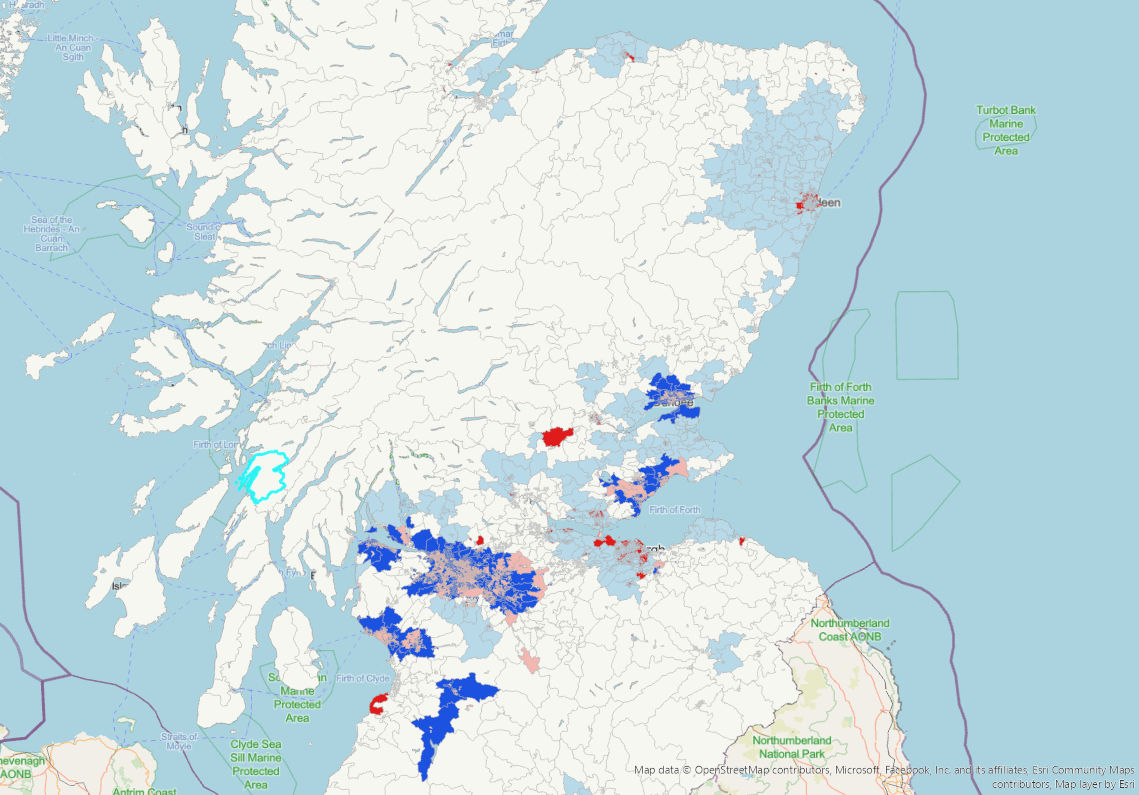

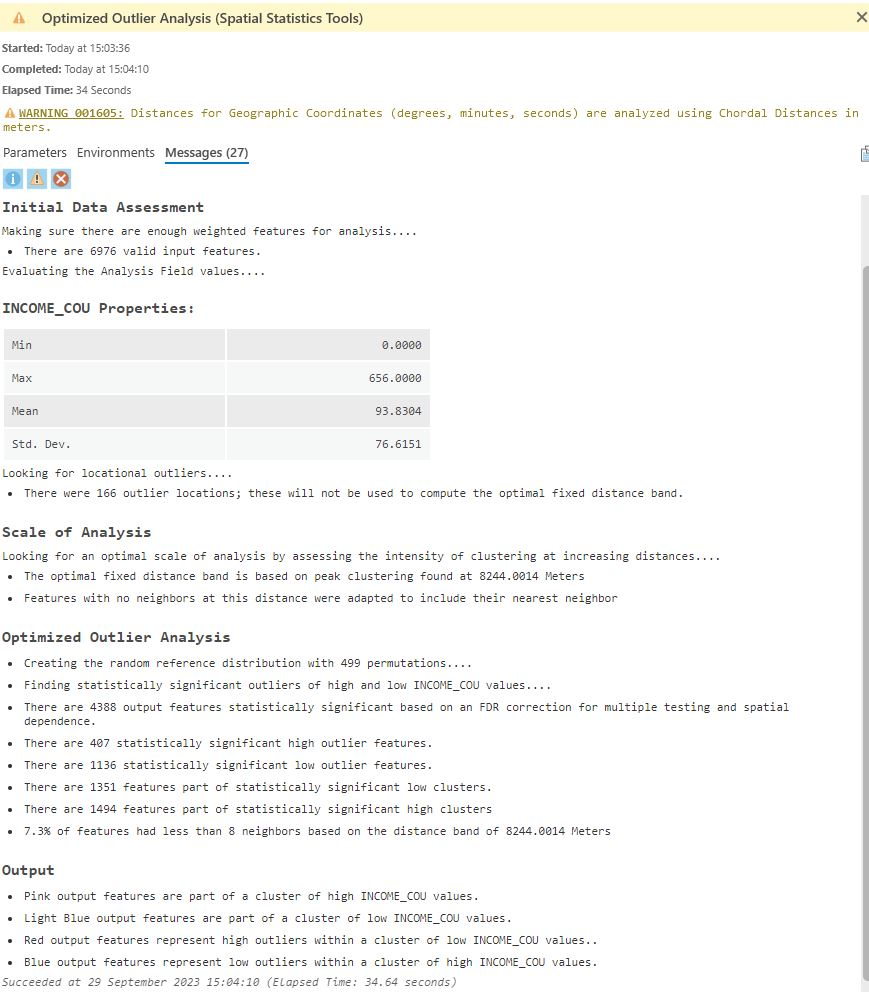

#### Employment Deprived - 2020 - Outlier Analysis

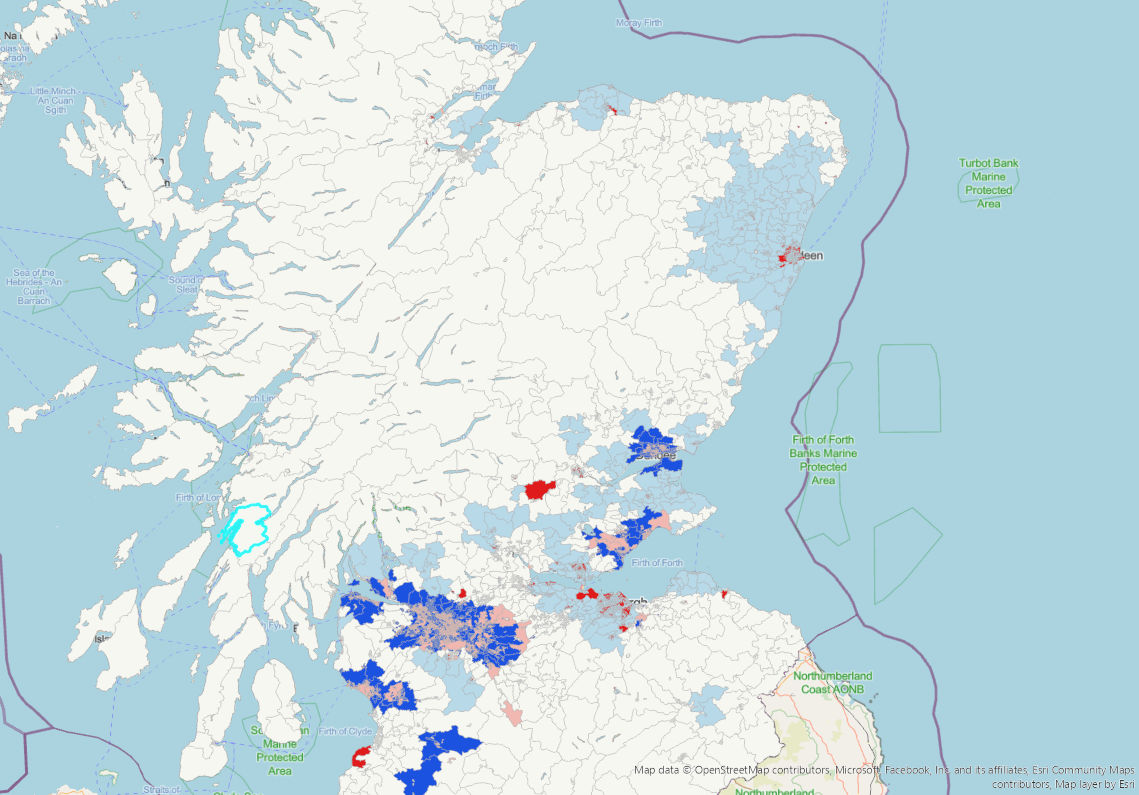

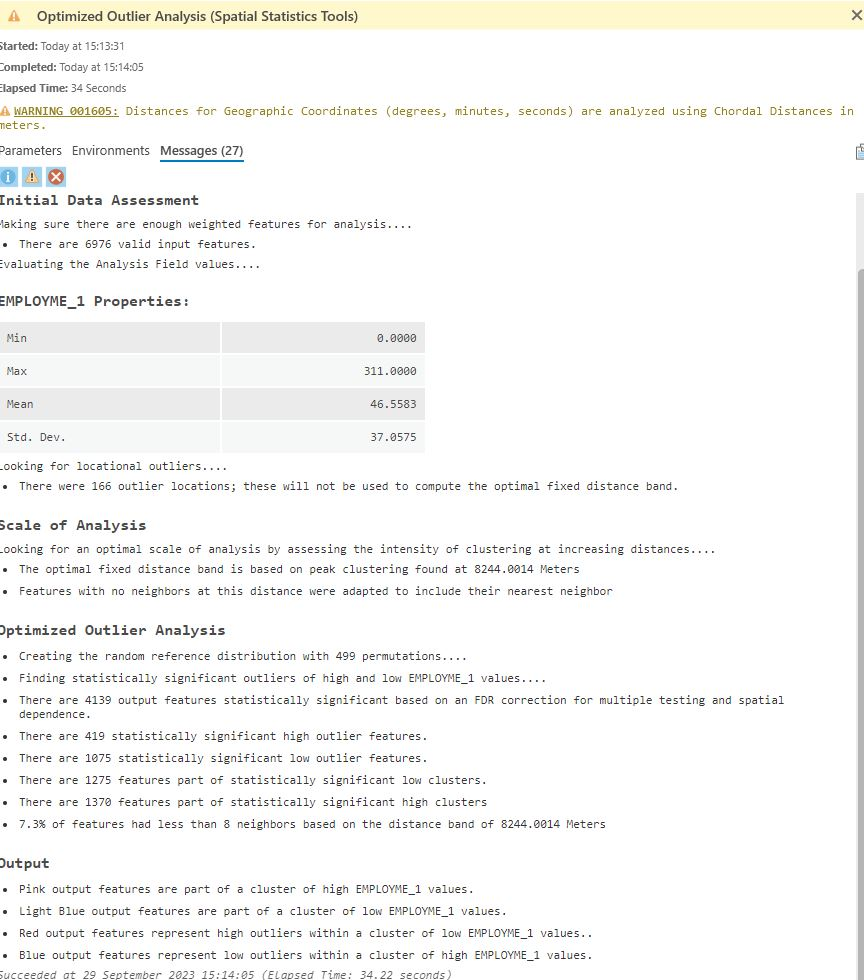

#### Overcrowded - 2020 - Outlier Analysis

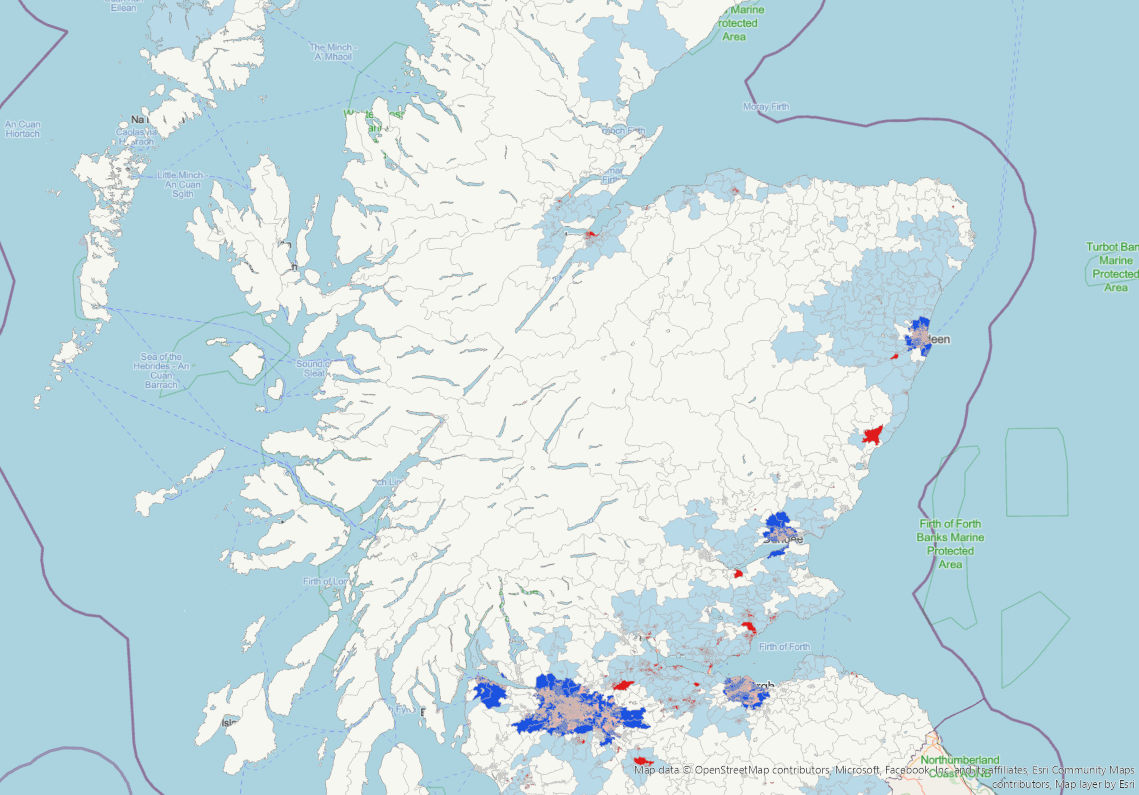

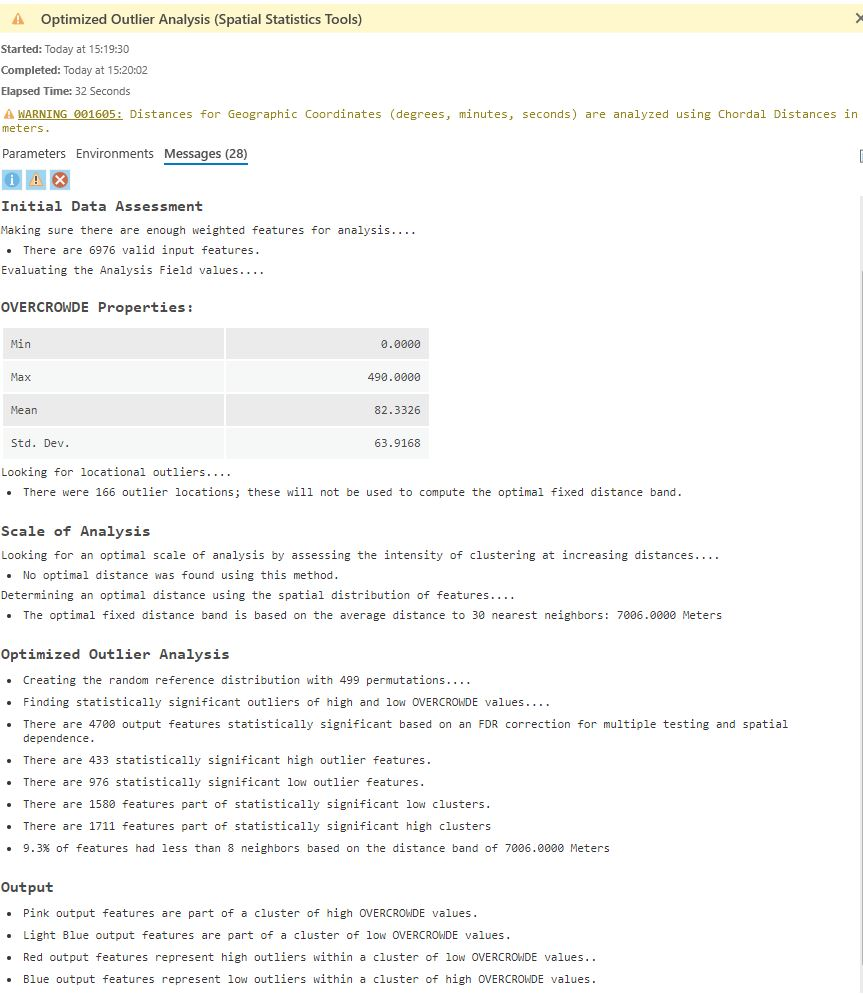

#### Drivetime to GP surgery - 2020 - Outlier Analysis

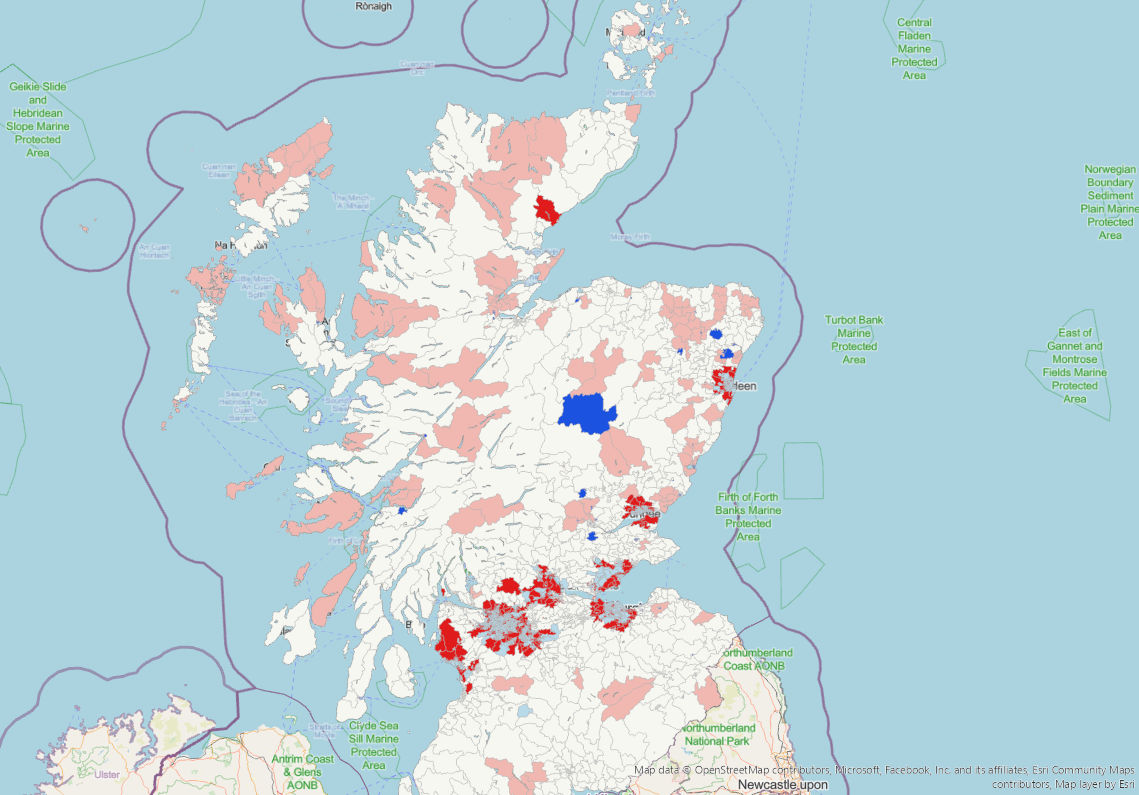

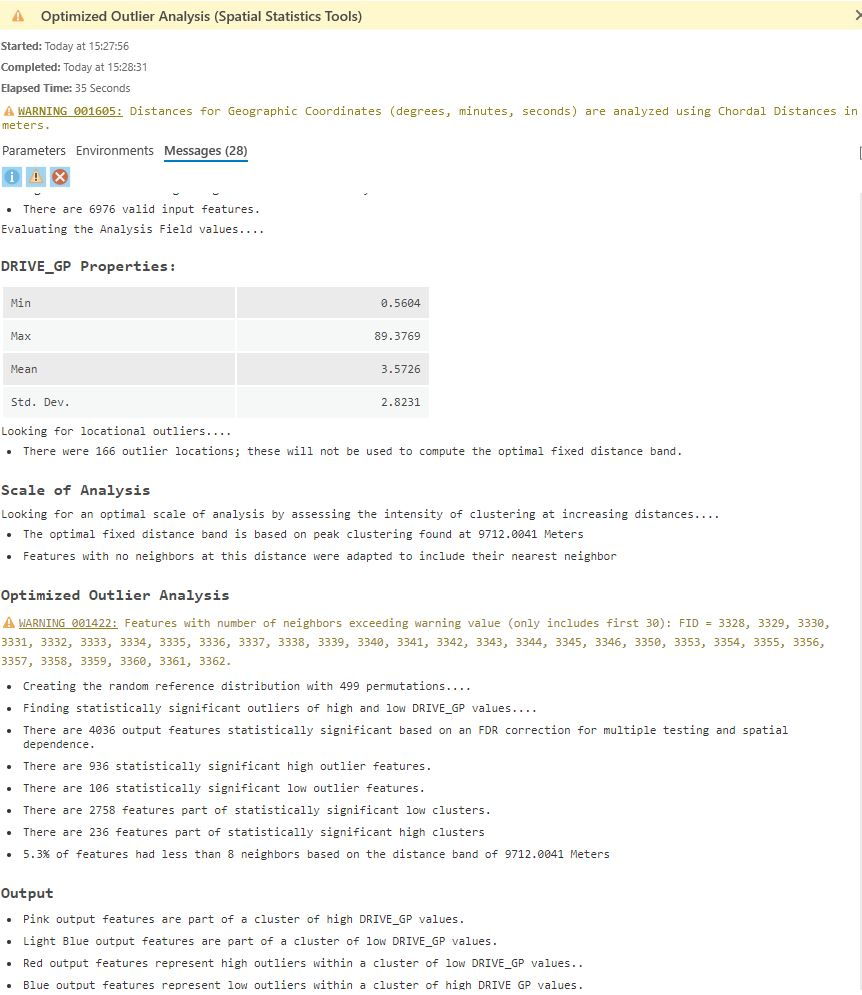